# Introduccion

Este notebook contiene los procesos que se han realizado para limpiar las bases de datos de contratos del sistema RENOVA de la SUPERINTENDENCIA DE VIGILANCIA Y SEGURIDAD PRIVADA DE COLOMBIA. 

Contiene las funciones e scripts para cargar los datasets en Jupyter o Colab, a partir de archivos en formato CSV. 

Esta es la primera etapa del trabajo con esstos datos. 


In [1]:
# First import the required libraries.
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [2]:
# To load a file into colab:
import io
import os

In [3]:
# Ajustar No Maximo de Columnas para mostrar
# pd.get_option("display.max_columns")
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_columns', 20) # reset to default

In [4]:
# Ajustar el tamaño máximo de columna que se muestra
#pd.get_option('display.max_colwidth')
#pd.set_option('display.max_colwidth', -1) 
#pd.set_option('display.max_colwidth', 50)  # reset to default

In [5]:
# Ajustar el número máximo de filas para mostrar
#pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None) # mostrar todas
#pd.set_option('display.max_rows', 60) # reset to default

In [6]:
#para poder ver los montos en valores con todas las cifras significativas en vez de notación científica
pd.set_option('display.float_format',  '{:,.2f}'.format)

# 1: **Data Loading**

## Load CSV into colab 
From Google Drive only (DO NOT RUN if in Jupyter):

In [7]:
# For Using Google Drive, (Only if executing notebook from Google colab):
from google.colab import drive
drive.mount('/content/drive')

# after that:
# <--- Refresh mounted Drive
# <--- Look for file and get the path link

Mounted at /content/drive


### Find the file

In [8]:
# Get the current directory
print(os.getcwd())
# Check if the directory exists
print(os.path.exists('../'))

/content
True


In [9]:
ls

drive/  sample_data/


In [10]:
cd /content/drive/MyDrive/Observatorio SPVS/CU_Gasto/BD_Empresas

/content/drive/MyDrive/Observatorio SPVS/CU_Gasto/BD_Empresas


# 2: **Cuales empresas están en RENOVA?**

## Cuáles empresas están en la base de empresas?

In [ ]:
# Empresas RENOVA Consolidadas (Proveedoras de Servicios y de tecnologia)
PATH = '/content/drive/MyDrive/Observatorio SPVS/BD RENOVA - Empresas/Empresas_Inscritas_en_el_Registro - Consolidado de Empresas_Inscritas_Limpio.csv'
df_Empresas = pd.read_csv(PATH, encoding = 'utf-8', dtype='str', sep=',' )
df_Empresas.shape

(2522, 22)

In [ ]:
df_Empresas.columns

Index(['Index', 'Repetido?', 'Repetido en la otra base', 'NIT', 'RAZÓN SOCIAL',
       'ACRÓNIMO', 'TIPO DE SERVICIO', 'TIPO DE TRÁMITE', 'TIPO OFICINA',
       'DIRECCIÓN', 'DEPARTAMENTO', 'CIUDAD', 'TELÉFONO',
       'CORREO ELECTRONICO - RUES', 'REPRESENTANTE LEGAL O ADMINISTRADOR',
       'ARRENDAMIENTO', 'COMERCIALIZACION', 'FABRICACION', 'IMPORTACION',
       'INSTALACION', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
df_Empresas.head()

,Index,Repetido?,Repetido en la otra base,NIT,RAZÓN SOCIAL,ACRÓNIMO,TIPO DE SERVICIO,TIPO DE TRÁMITE,TIPO OFICINA,DIRECCIÓN,DEPARTAMENTO,CIUDAD,TELÉFONO,CORREO ELECTRONICO - RUES,REPRESENTANTE LEGAL O ADMINISTRADOR,ARRENDAMIENTO,COMERCIALIZACION,FABRICACION,IMPORTACION,INSTALACION,Latitude,Longitude
0,251,17741,8110254461,8110254461,TRONEX S.A.S,TRONEX SA,DEPARTAMENTO DE SEGURIDAD,RENOVACIÓN,P,CARRERA 67 No. 1 SUR - 92,ANTIOQUIA,MEDELLIN,4488090,notificaciones@tronex.com,JAIRO ENRIQUE LEIVA SANTANA,NaN,NaN,NaN,IMPORTACION,INSTALACION,"6,2854449","-75,5735197"
1,285,20333,8300133604,8300133604,CONTROL LUMINICO ELECTRONICO E.U.,NO REGISTRA,INSCRITA EN EL REGISTRO,NaN,P,CARRERA 94 C No. 147 A - 60 OFICINA 101,BOGOTÁ D.C.,BOGOTÁ D.C.,O,NO REGISTRA,JUAN GABRIEL BALSERO FIERRO,NaN,COMERCIALIZACION,NaN,IMPORTACION,INSTALACION,"4,7431263","-74,0859421"
2,298,12789,8300182141,8300182141,MPS MAYORISTA DE COLOMBIA S A,NO REGISTRA,INSCRITA EN EL REGISTRO,NaN,P,AUTOPISTA MEDELLIN CALLE 80 KM 2 - PARQUE EM...,CUNDINAMARCA,COTA,8766565 ext.6542,lcarrillo@mps.com.co,JUAN DIEGO LOPEZ ARANGO,NaN,NaN,NaN,IMPORTACION,NaN,"4,7440285","-74,1393814"
3,317,8067,8300379463,8300379463,PANAMERICANA LIBRERIA Y PAPELERIA S A,NO REGISTRA,DEPARTAMENTO DE SEGURIDAD,RENOVACIÓN,P,CALLE 12 No. 34 - 30,BOGOTÁ D.C.,BOGOTÁ D.C.,3649000,acleves@panamericana.com.co,CARLOS ALBERTO FRANCO RIOS,NaN,NaN,NaN,IMPORTACION,NaN,"4,6159107","-74,0973613"
4,475,5943,8600056691,8600056691,LEGRAND COLOMBIA S.A.,NO REGISTRA,DEPARTAMENTO DE SEGURIDAD,RENOVACIÓN,P,CALLE 65A No. 93 - 91,BOGOTÁ D.C.,BOGOTÁ D.C.,4376700,camilo.riveros@legrand.com.co,JUAN PABLO ROJAS VARGAS,NaN,NaN,NaN,IMPORTACION,NaN,"4,6932203","-74,1182725"


In [ ]:
df_Empresas['NIT'].unique().shape

(2482,)

In [ ]:
df_Empresas['NIT'] = pd.to_numeric(df_Empresas['NIT'])
df_Empresas['NIT'] = df_Empresas['NIT'].astype(int)

## Identificar NITs en RENOVA (Cliente Gobierno)

In [ ]:
df_Gobierno = pd.read_csv('/content/drive/MyDrive/Observatorio SPVS/BD RENOVA - Contratos cliente gobierno/contratos_gobierno_tipo_vigilado_Datos Validos.csv', encoding = 'utf-8', dtype='str', sep=',' )
df_Gobierno.shape

(1792, 59)

In [ ]:
df_Gobierno.columns

Index(['Index', 'V1', 'ID_CONTRATO', 'FECHA_INICIO_CONTRATO', 'Año Inicio',
       'FECHA_FIN_CONTRATO', 'Año FIN', 'Dias Contrato', 'MONTO_CONTRATO',
       'CANTIDAD_PUESTOS_CONTRATO', 'NIT_VIGILADO_x',
       'DESCRIPCION_VALOR_AGREGADO', 'ID_ESTADO_CONTRATO',
       'FECHA_CONTRATO_ESTADO', 'MAXDATE', 'MINDATE', 'ID_CLIENTE',
       'TIPO_CONTRATO', 'ACTIVO_x', 'NUMERO_DOCUMENTO_CLIENTE',
       'DIGITO_VERIFICACION', 'RAZON_SOCIAL_CLIENTE', 'PRIMER_NOMBRE_CLIENTE',
       'SEGUNDO_NOMBRE_CLIENTE', 'PRIMER_APELLIDO_CLIENTE',
       'SEGUNDO_APELIDO_CLIENTE', 'SECTOR_CLIENTE', 'CIIU_CLIENTE',
       'DIRECCION_CLIENTE', 'TELEFONO_FIJO_CLIENTE', 'TELEFONO_MOVIL_CLIENTE',
       'CORREO_ELECTRONICO_CLIENTE', 'CORREO_ELECTRONICO_ALTERNATIVO_CLIENTE',
       'ID_CIUDAD', 'ID_DEPARTAMENTO', 'ID_DEPARTAMENTO1',
       'ID_TIPO_DOCUMENTO_IDENTIFICACION',
       'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE', 'ID_TIPO_CLIENTE',
       'TIPO_VIA', 'NOMBRE_NUM_VIA', 'PREFIJO_UNO', 'PREFIJO_UN

In [ ]:
df_Gobierno[df_Gobierno['NIT_VIGILADO_x'] != df_Gobierno['NIT_VIGILADO']].shape

(16, 59)

In [ ]:
df_Gobierno[df_Gobierno['NIT_VIGILADO_x'] != df_Gobierno['NIT_VIGILADO']]

,Index,V1,ID_CONTRATO,FECHA_INICIO_CONTRATO,Año Inicio,FECHA_FIN_CONTRATO,Año FIN,Dias Contrato,MONTO_CONTRATO,CANTIDAD_PUESTOS_CONTRATO,NIT_VIGILADO_x,DESCRIPCION_VALOR_AGREGADO,ID_ESTADO_CONTRATO,FECHA_CONTRATO_ESTADO,MAXDATE,MINDATE,ID_CLIENTE,TIPO_CONTRATO,ACTIVO_x,NUMERO_DOCUMENTO_CLIENTE,DIGITO_VERIFICACION,RAZON_SOCIAL_CLIENTE,PRIMER_NOMBRE_CLIENTE,SEGUNDO_NOMBRE_CLIENTE,PRIMER_APELLIDO_CLIENTE,SEGUNDO_APELIDO_CLIENTE,SECTOR_CLIENTE,CIIU_CLIENTE,DIRECCION_CLIENTE,TELEFONO_FIJO_CLIENTE,TELEFONO_MOVIL_CLIENTE,CORREO_ELECTRONICO_CLIENTE,CORREO_ELECTRONICO_ALTERNATIVO_CLIENTE,ID_CIUDAD,ID_DEPARTAMENTO,ID_DEPARTAMENTO1,ID_TIPO_DOCUMENTO_IDENTIFICACION,NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE,ID_TIPO_CLIENTE,TIPO_VIA,NOMBRE_NUM_VIA,PREFIJO_UNO,PREFIJO_UNO_UNO,NUMERO_VIA_GENERADORA,PREFIJO_DOS,PREFIJO_DOS_DOS,NUMERO_PLACA,COMPLEMENTARIO_LISTA,COMPLEMENTARIO_TEXTO,ID_TIPO_DOCUMENTO_IDENTIFICACION_REPRESENTANTE_LEGAL_CLIENTE,NIT_VIGILADO_y,CONSORCIO,ID_DIRECCION,ACTIVO_y,NIT_VIGILADO,ID_TIPO_SERVICIO,ID_TIPO_SOCIEDAD,RAZON_SOCIAL_VIGILADO,CIIU_VIGILADO
158,171,95498,190296,22/1/2019,2019,23/12/2019,2019,335,$ 218.446.040,5,822005145,Un (1) servicio 24 horas con arma (11 meses).,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,289,105157,175404,23/4/2018,2018,30/12/2018,2018,251,$ 653.474.563,10,800185215,teniendo en cuenta que el sistema tiene un tie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,408,128352,106569,10/4/2015,2015,30/4/2015,2015,20,$ 998.878.450,21,822002315,servicio 24 horas armados ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,414,174939,51371,1/7/2012,2012,30/6/2013,2013,364,$ 1.029.285.532,8,860513971,Dos (2) Servicios 24 horas sin armas con rad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,512,181130,68967,1/12/2012,2012,30/7/2014,2014,606,$ 1.351.094.153,26,860517560,"Vigilancia fija con arma, sin arma y medio can...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,517,175040,134773,6/5/2016,2016,28/2/2018,2018,663,$ 1.393.290.411,6,860513971,"1 SERVICIO 24 HORAS, ARMADO, DE DOMINGO A DOMINGO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,519,115662,33907,1/1/2015,2015,28/6/2014,2014,187,$ 1.400.000.000,15,804000387,El valor especÃ­ficado del Monto serÃ¡ hasta a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732,778,95459,171969,24/3/2018,2018,8/1/2019,2019,290,$ 3.141.591.760,48,822005145,**SERVICIOS 24 HORAS PERMANENTES CON ARMA**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817,872,156969,75485,31/8/2013,2013,30/4/2014,2014,242,$ 56.000.000,9,890917141,medellÃ¬n 4 servicios 12 horas Diurnas lunes -...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,937,132014,80761,21/2/2014,2014,28/2/2015,2015,372,$ 35.077.830,8,86

In [ ]:
# Poner en una sola columna todos los NITs del contratista

Gobierno_columnas_utiles = ['Index', 'ID_CONTRATO', 'FECHA_INICIO_CONTRATO', 'Año Inicio',
       'FECHA_FIN_CONTRATO', 'Año FIN', 'Dias Contrato', 'MONTO_CONTRATO',
       'CANTIDAD_PUESTOS_CONTRATO', 
       'DESCRIPCION_VALOR_AGREGADO', 'ID_CLIENTE', 'ACTIVO_x', 'NUMERO_DOCUMENTO_CLIENTE',
       'RAZON_SOCIAL_CLIENTE', 'CIIU_CLIENTE', 
       'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE', 
       'ID_TIPO_DOCUMENTO_IDENTIFICACION_REPRESENTANTE_LEGAL_CLIENTE',
       'CONSORCIO', 'ACTIVO_y',
       'ID_TIPO_SERVICIO',
       'RAZON_SOCIAL_VIGILADO', 'CIIU_VIGILADO']
#Gobierno_columnas_utiles

df_Gobierno2 = pd.melt(df_Gobierno, id_vars = Gobierno_columnas_utiles, value_vars = ['NIT_VIGILADO_x', 'NIT_VIGILADO_y', 'NIT_VIGILADO'], var_name='NIT_x/y', value_name='NIT_VIGILADO')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_Gobierno2['NIT_x/y'].value_counts()

NIT_VIGILADO_x    1792
NIT_VIGILADO_y    1792
NIT_VIGILADO      1792
Name: NIT_x/y, dtype: int64

In [ ]:
#df_Gobierno2['NIT_VIGILADO'] = df_Gobierno2['NIT_VIGILADO'].astype(str)
#df_Gobierno2['NIT_VIGILADO'] = df_Gobierno2['NIT_VIGILADO'].str.replace(".0", "").str.replace(r'[^0-9]', '', regex=True)
#df_Gobierno2['NIT_VIGILADO'] = pd.to_numeric(df_Gobierno2['NIT_VIGILADO'], downcast="integer")
#df_Gobierno2.loc[df_Gobierno2[ 'NIT_VIGILADO'].isna(), 'NIT_VIGILADO'] = 0
#df_Gobierno2[ 'NIT_VIGILADO'] = df_Gobierno2[ 'NIT_VIGILADO'].astype(int)
df_Gobierno2['NIT_VIGILADO'].value_counts().head()

822002315    416
900248356    309
900439597    294
830070625    255
900251432    195
Name: NIT_VIGILADO, dtype: int64

In [ ]:
len(df_Gobierno2['NIT_VIGILADO'].unique())

174

In [ ]:
df_Gobierno2['NUMERO_DOCUMENTO_CLIENTE'] = df_Gobierno2['NUMERO_DOCUMENTO_CLIENTE'].astype(str)
df_Gobierno2.loc[df_Gobierno2['NUMERO_DOCUMENTO_CLIENTE']=="R 802 23/0",'NUMERO_DOCUMENTO_CLIENTE'] = '802230'
df_Gobierno2['NUMERO_DOCUMENTO_CLIENTE'] = df_Gobierno2['NUMERO_DOCUMENTO_CLIENTE'].str.replace(r".0", r"").str.replace(r'[^0-9]', r'', regex=True)
df_Gobierno2['NUMERO_DOCUMENTO_CLIENTE'] = pd.to_numeric(df_Gobierno2['NUMERO_DOCUMENTO_CLIENTE'], downcast="integer")
df_Gobierno2.loc[df_Gobierno2[ 'NUMERO_DOCUMENTO_CLIENTE'].isna(), 'NUMERO_DOCUMENTO_CLIENTE'] = 0
df_Gobierno2['NUMERO_DOCUMENTO_CLIENTE'] = df_Gobierno2['NUMERO_DOCUMENTO_CLIENTE'].astype(int)
df_Gobierno2['NUMERO_DOCUMENTO_CLIENTE'].value_counts().head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


8999961      594
823          303
477169       294
8999967      120
899999239    102
Name: NUMERO_DOCUMENTO_CLIENTE, dtype: int64

In [ ]:
df_Gobierno2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = df_Gobierno2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'].astype(str)
df_Gobierno2.loc[df_Gobierno2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE']=="79.882.394", 'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = "79882394"
df_Gobierno2.loc[df_Gobierno2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE']=="D20102541", 'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = "20102541"
df_Gobierno2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = df_Gobierno2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'].str.replace(r".0", r"").str.replace(r'[^0-9]', r'', regex=True)
df_Gobierno2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = pd.to_numeric(df_Gobierno2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'], downcast="integer") #, errors='ignore'
df_Gobierno2.loc[df_Gobierno2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'].isna(), 'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = 0
df_Gobierno2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = df_Gobierno2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'].astype(int)
df_Gobierno2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'].value_counts().head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


0             2904
793143          78
12542636        51
797777          51
1121845374      42
Name: NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE, dtype: int64

In [ ]:
df_Gobierno2.shape

(5376, 24)

In [ ]:
df_Gobierno2 = df_Gobierno2.drop_duplicates(['Index', 'ID_CONTRATO', 'FECHA_INICIO_CONTRATO', 'Año Inicio',
       'FECHA_FIN_CONTRATO', 'Año FIN', 'Dias Contrato', 'MONTO_CONTRATO',
       'CANTIDAD_PUESTOS_CONTRATO', 'DESCRIPCION_VALOR_AGREGADO', 'ID_CLIENTE',
       'ACTIVO_x', 'NUMERO_DOCUMENTO_CLIENTE', 'RAZON_SOCIAL_CLIENTE',
       'CIIU_CLIENTE', 
       'CONSORCIO', 'ACTIVO_y', 'ID_TIPO_SERVICIO', 'RAZON_SOCIAL_VIGILADO',
       'CIIU_VIGILADO', 'NIT_VIGILADO'])
df_Gobierno2.shape

(1809, 24)

In [ ]:
# Contratos para comparar con SECOP:

df_Gobierno2.head()

# los NITs de Clientes estan en la variable 'NUMERO_DOCUMENTO_CLIENTE'

# los NITs de Contratistas están en la variable  'NIT_VIGILADO'

# los Representantes Legales pueden cambiar en el tiempo, pero sirven para identificar un contrato y diferenciarlo de otro
# estan en la variabla 'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE' 

,Index,ID_CONTRATO,FECHA_INICIO_CONTRATO,Año Inicio,FECHA_FIN_CONTRATO,Año FIN,Dias Contrato,MONTO_CONTRATO,CANTIDAD_PUESTOS_CONTRATO,DESCRIPCION_VALOR_AGREGADO,ID_CLIENTE,ACTIVO_x,NUMERO_DOCUMENTO_CLIENTE,RAZON_SOCIAL_CLIENTE,CIIU_CLIENTE,NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE,ID_TIPO_DOCUMENTO_IDENTIFICACION_REPRESENTANTE_LEGAL_CLIENTE,CONSORCIO,ACTIVO_y,ID_TIPO_SERVICIO,RAZON_SOCIAL_VIGILADO,CIIU_VIGILADO,NIT_x/y,NIT_VIGILADO
0,1,145873,7/3/2017,2017,6/4/2017,2017,30,$ 1.048.063,NaN,NaN,140070,1,477169,AGENCIA COLOMBIANA PARA LA REINTEGRACION DE PE...,NaN,0,NaN,0.0,1,6,VECTOR LTDA ALQUILER DE VEHICULOS BLINDADOS,7111,NIT_VIGILADO_x,900439597
1,2,17321,27/6/2012,2012,28/3/2014,2014,639,$ 34.183.679,1,NaN,45215,1,8011153,POSITIVA COMPAÃ‘IA DE SEGUROS S.A.,NaN,19164772,1.0,0.0,1,1,RAYO SEGURIDAD ARMADA Y MONITOREO ELECTRONICO ...,7492,NIT_VIGILADO_x,830501400
2,3,231489,1/3/2021,2021,28/2/2022,2022,364,$ 144.455.688,3,NaN,255125,1,47635,INSTITUTO DEPARTAMENTAL DE TRANSITO Y TRANSPOR...,9162.0,4799,1.0,0.0,1,1,DAMASCO SEGURIDAD LTDA,8010,NIT_VIGILADO_x,900218370
3,4,16695,1/7/2012,2012,31/12/2012,2012,183,$ 83.532.000,3,NaN,35752,1,8999904,INSTITUTO GEOGRAFICO AGUSTIN CODAZZI,NaN,134550,1.0,0.0,1,3,COOPERATIVA ESPECIALIZADA EN SEGURIDAD Y ESCOL...,8010,NIT_VIGILADO_x,800152394
4,5,228005,18/11/2020,2020,31/7/2021,2021,255,$ 8.143.820,NaN,NaN,30506,1,981,MUNICIPIO DE CASTILLA LA NUEVA.,8412,7945,1.0,0.0,1,1,SEGURIDAD ESTELAR LTDA,8010,NIT_VIGILADO_x,822005145


In [ ]:
# Poner en una sola columna todos los Numeros de identificacion del cliente
'''
Gobierno_columnas_utiles = ['Index', 'ID_CONTRATO', 'FECHA_INICIO_CONTRATO', 'Año Inicio',
       'FECHA_FIN_CONTRATO', 'Año FIN', 'Dias Contrato', 'MONTO_CONTRATO',
       'CANTIDAD_PUESTOS_CONTRATO', 'DESCRIPCION_VALOR_AGREGADO', 'ID_CLIENTE',
       'ACTIVO_x', 'RAZON_SOCIAL_CLIENTE', 'CIIU_CLIENTE', 
       'ID_TIPO_DOCUMENTO_IDENTIFICACION_REPRESENTANTE_LEGAL_CLIENTE',
       'CONSORCIO', 'ACTIVO_y', 'ID_TIPO_SERVICIO', 'RAZON_SOCIAL_VIGILADO',
       'CIIU_VIGILADO', 'NIT_x/y', 'NIT_VIGILADO']

df_Gobierno3 = pd.melt(df_Gobierno2, id_vars = Gobierno_columnas_utiles, value_vars = ['NUMERO_DOCUMENTO_CLIENTE', 'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'], var_name='ID_CLIENTE/Representante', value_name='NUMERO_DOCUMENTO_CLIENTE')
df_Gobierno3['NIT_VIGILADO'] = df_Gobierno3['NIT_VIGILADO'].str.strip()
df_Gobierno3['NUMERO_DOCUMENTO_CLIENTE'] = df_Gobierno3['NUMERO_DOCUMENTO_CLIENTE'].str.strip()
df_Gobierno3.shape
df_Gobierno3.columns
'''

"\nGobierno_columnas_utiles = ['Index', 'ID_CONTRATO', 'FECHA_INICIO_CONTRATO', 'Año Inicio',\n       'FECHA_FIN_CONTRATO', 'Año FIN', 'Dias Contrato', 'MONTO_CONTRATO',\n       'CANTIDAD_PUESTOS_CONTRATO', 'DESCRIPCION_VALOR_AGREGADO', 'ID_CLIENTE',\n       'ACTIVO_x', 'RAZON_SOCIAL_CLIENTE', 'CIIU_CLIENTE', \n       'ID_TIPO_DOCUMENTO_IDENTIFICACION_REPRESENTANTE_LEGAL_CLIENTE',\n       'CONSORCIO', 'ACTIVO_y', 'ID_TIPO_SERVICIO', 'RAZON_SOCIAL_VIGILADO',\n       'CIIU_VIGILADO', 'NIT_x/y', 'NIT_VIGILADO']\n\ndf_Gobierno3 = pd.melt(df_Gobierno2, id_vars = Gobierno_columnas_utiles, value_vars = ['NUMERO_DOCUMENTO_CLIENTE', 'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'], var_name='ID_CLIENTE/Representante', value_name='NUMERO_DOCUMENTO_CLIENTE')\ndf_Gobierno3['NIT_VIGILADO'] = df_Gobierno3['NIT_VIGILADO'].str.strip()\ndf_Gobierno3['NUMERO_DOCUMENTO_CLIENTE'] = df_Gobierno3['NUMERO_DOCUMENTO_CLIENTE'].str.strip()\ndf_Gobierno3.shape\ndf_Gobierno3.columns\n"

In [ ]:
'''
df_Gobierno3 = df_Gobierno3.drop_duplicates(['Index', 'ID_CONTRATO', 'FECHA_INICIO_CONTRATO', 'Año Inicio',
       'FECHA_FIN_CONTRATO', 'Año FIN', 'Dias Contrato', 'MONTO_CONTRATO', 'CANTIDAD_PUESTOS_CONTRATO', 
       'DESCRIPCION_VALOR_AGREGADO', 'ID_CLIENTE', 'ACTIVO_x', 'RAZON_SOCIAL_CLIENTE', 'CIIU_CLIENTE',
       'ID_TIPO_DOCUMENTO_IDENTIFICACION_REPRESENTANTE_LEGAL_CLIENTE', 'CONSORCIO', 'ACTIVO_y', 
       'ID_TIPO_SERVICIO', 'RAZON_SOCIAL_VIGILADO', 'CIIU_VIGILADO', 
       'NIT_VIGILADO', 'NUMERO_DOCUMENTO_CLIENTE'])
df_Gobierno3.shape
'''

"\ndf_Gobierno3 = df_Gobierno3.drop_duplicates(['Index', 'ID_CONTRATO', 'FECHA_INICIO_CONTRATO', 'Año Inicio',\n       'FECHA_FIN_CONTRATO', 'Año FIN', 'Dias Contrato', 'MONTO_CONTRATO', 'CANTIDAD_PUESTOS_CONTRATO', \n       'DESCRIPCION_VALOR_AGREGADO', 'ID_CLIENTE', 'ACTIVO_x', 'RAZON_SOCIAL_CLIENTE', 'CIIU_CLIENTE',\n       'ID_TIPO_DOCUMENTO_IDENTIFICACION_REPRESENTANTE_LEGAL_CLIENTE', 'CONSORCIO', 'ACTIVO_y', \n       'ID_TIPO_SERVICIO', 'RAZON_SOCIAL_VIGILADO', 'CIIU_VIGILADO', \n       'NIT_VIGILADO', 'NUMERO_DOCUMENTO_CLIENTE'])\ndf_Gobierno3.shape\n"

In [ ]:
nits_df_Gobierno2 = df_Gobierno2[['ACTIVO_x', 'ACTIVO_y', 'NIT_VIGILADO',  'RAZON_SOCIAL_VIGILADO',
              'CIIU_VIGILADO', 'CONSORCIO', 'ID_TIPO_SERVICIO', 
       'ID_TIPO_DOCUMENTO_IDENTIFICACION_REPRESENTANTE_LEGAL_CLIENTE', 'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE']]

In [ ]:
# Exportar a una tabla de todos las empresas que contratan con el estado
#nits_df_Gobierno2.to_csv('NITs_IDs_BD_RENOVA-Contratos_cliente_gobierno.csv')

### Comparar NITs 
Comparar los NITS en el registro de empresas en RENOVA con los NITs de los contratos registrados en RENOVA

In [ ]:
nits_df_Gobierno2[ 'NIT_VIGILADO'].value_counts().head()

822002315    140
900248356    103
900439597     98
830070625     85
900251432     65
Name: NIT_VIGILADO, dtype: int64

In [ ]:
df_Empresas['NIT'].value_counts().head()

8600405761    23
9000409554     2
8605266031     2
9006853301     2
9001071409     2
Name: NIT, dtype: int64

In [ ]:
len([Nit for Nit in df_Empresas['NIT']])

2522

In [ ]:
len([Nit for Nit in nits_df_Gobierno2[ 'NIT_VIGILADO']])

1809

In [ ]:
len([Nit for Nit in nits_df_Gobierno2[ 'NIT_VIGILADO'].unique() if Nit in df_Empresas['NIT']])

0

In [ ]:
set([Nit for Nit in nits_df_Gobierno2[ 'NIT_VIGILADO'] if Nit in df_Empresas['NIT']])

set()

In [ ]:
len([Nit for Nit in df_Empresas['NIT'] if Nit in nits_df_Gobierno2[ 'NIT_VIGILADO']])

0

## Lista de contratos con el Gobierno de empresas registradas en RENOVA


In [ ]:
df_Gobierno[['NIT_VIGILADO_x', 'NIT_VIGILADO_y', 'NIT_VIGILADO']] = df_Gobierno[['NIT_VIGILADO_x', 'NIT_VIGILADO_y', 'NIT_VIGILADO']].astype('category')
#df_Gobierno.info()
df_Gobierno['NIT_VIGILADO'] = df_Gobierno['NIT_VIGILADO'].str.strip()
df_Gobierno['NIT_VIGILADO_x'] = df_Gobierno['NIT_VIGILADO_x'].str.strip()
df_Gobierno['NIT_VIGILADO_y'] = df_Gobierno['NIT_VIGILADO_y'].str.strip()

In [ ]:
df_Gobierno[df_Gobierno['NIT_VIGILADO_x'].isin(lista_empresas)
            #or df_Gobierno['NIT_VIGILADO_y'].isin(lista_empresas)
            #or df_Gobierno['NIT_VIGILADO'].isin(lista_empresas)
            ].head()

NameError: ignored

In [ ]:
bdf_gob = pd.melt(df_Gobierno[['Index', 'NIT_VIGILADO_x', 'NIT_VIGILADO_y', 'NIT_VIGILADO']], id_vars = 'Index', value_vars = ['NIT_VIGILADO_x', 'NIT_VIGILADO_y', 'NIT_VIGILADO'],  ignore_index=False)
df_gob.set_index('Index', inplace = True)
df_gob

#### Acceso desde Jupyter Workspace

In [ ]:
cd '../Datos Empresas Servicios'

[Errno 2] No such file or directory: '../Datos Empresas Servicios'
/content/drive/MyDrive/Observatorio SPVS/CU_Gasto/BD_Empresas


In [ ]:
ls

empresas_que_contratan_con_estado.csv
empresas_que_contratan_en_SECOP_2.csv
empresas_que_contratan_en_SECOP.csv
NITs_IDs_BD_RENOVA-Contratos_cliente_gobierno.csv


## Cuales empresas Registradas están en la base de contratos de RENOVA?

In [ ]:
df6 = pd.read_csv('/content/drive/MyDrive/Observatorio SPVS/BD RENOVA - Empresas/Empresas_Inscritas_en_el_Registro - Consolidado de Empresas_Inscritas_Limpio.csv')
df6.columns

Index(['Index', 'Repetido?', 'Repetido en la otra base', 'NIT', 'RAZÓN SOCIAL',
       'ACRÓNIMO', 'TIPO DE SERVICIO', 'TIPO DE TRÁMITE', 'TIPO OFICINA',
       'DIRECCIÓN', 'DEPARTAMENTO', 'CIUDAD', 'TELÉFONO',
       'CORREO ELECTRONICO - RUES', 'REPRESENTANTE LEGAL O ADMINISTRADOR',
       'ARRENDAMIENTO', 'COMERCIALIZACION', 'FABRICACION', 'IMPORTACION',
       'INSTALACION', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
df7 = pd.read_csv('/content/drive/MyDrive/Observatorio SPVS/BD RENOVA - Contratos cliente gobierno/contratos_gobierno_tipo_vigilado_Datos Validos.csv')
#df7.info()
df7.columns

Index(['Index', 'V1', 'ID_CONTRATO', 'FECHA_INICIO_CONTRATO', 'Año Inicio',
       'FECHA_FIN_CONTRATO', 'Año FIN', 'Dias Contrato', 'MONTO_CONTRATO',
       'CANTIDAD_PUESTOS_CONTRATO', 'NIT_VIGILADO_x',
       'DESCRIPCION_VALOR_AGREGADO', 'ID_ESTADO_CONTRATO',
       'FECHA_CONTRATO_ESTADO', 'MAXDATE', 'MINDATE', 'ID_CLIENTE',
       'TIPO_CONTRATO', 'ACTIVO_x', 'NUMERO_DOCUMENTO_CLIENTE',
       'DIGITO_VERIFICACION', 'RAZON_SOCIAL_CLIENTE', 'PRIMER_NOMBRE_CLIENTE',
       'SEGUNDO_NOMBRE_CLIENTE', 'PRIMER_APELLIDO_CLIENTE',
       'SEGUNDO_APELIDO_CLIENTE', 'SECTOR_CLIENTE', 'CIIU_CLIENTE',
       'DIRECCION_CLIENTE', 'TELEFONO_FIJO_CLIENTE', 'TELEFONO_MOVIL_CLIENTE',
       'CORREO_ELECTRONICO_CLIENTE', 'CORREO_ELECTRONICO_ALTERNATIVO_CLIENTE',
       'ID_CIUDAD', 'ID_DEPARTAMENTO', 'ID_DEPARTAMENTO1',
       'ID_TIPO_DOCUMENTO_IDENTIFICACION',
       'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE', 'ID_TIPO_CLIENTE',
       'TIPO_VIA', 'NOMBRE_NUM_VIA', 'PREFIJO_UNO', 'PREFIJO_UN

In [ ]:
# Ejemplo para eliminar NITs repetidos
# pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

In [ ]:
# Eliminar NITs repetidos:

#df7[['NIT_VIGILADO_x', 'NIT_VIGILADO_y', 'NIT_VIGILADO']].head()
contracts_NITs_list = df7[['NIT_VIGILADO_x', 'NIT_VIGILADO_y', 'NIT_VIGILADO']]
#contracts_NITs_list[['NIT_VIGILADO_y', 'NIT_VIGILADO']].astype(int)
contracts_NITs_list = pd.melt(df7, id_vars=['Index'], value_vars=['NIT_VIGILADO_x', 'NIT_VIGILADO_y', 'NIT_VIGILADO'])
contracts_NITs_list.drop(contracts_NITs_list.loc[contracts_NITs_list['value'].isna()].index, inplace = True)
contracts_NITs_list.info()
#contracts_NITs_list


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5344 entries, 0 to 5375
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Index     5344 non-null   int64  
 1   variable  5344 non-null   object 
 2   value     5344 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 167.0+ KB


In [ ]:
# De nuevo solo hay un  NIT en las dos bases de datos:
[nit for nit in contracts_NITs_list['value'].unique() if nit in df6['NIT'].unique()]

[8300636831.0]

## Identificar NITs en RENOVA (Todos los clientes)

In [ ]:
df_Clientes = pd.read_csv('/content/drive/MyDrive/Observatorio SPVS/BD RENOVA - Contratos Todos los Clientes/ContratosVigilados.csv')
df_Clientes.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(173136, 41)

In [ ]:
df_Clientes.columns

Index(['Unnamed: 0', 'index', 'FECHA_INICIO_CONTRATO', 'FECHA_FIN_CONTRATO',
       'MONTO_CONTRATO', 'CANTIDAD_PUESTOS_CONTRATO', 'NIT_VIGILADO_x',
       'DESCRIPCION_VALOR_AGREGADO', 'FECHA_CONTRATO_ESTADO', 'MAXDATE',
       'MINDATE', 'TIPO_CONTRATO', 'ACTIVO_x', 'NUMERO_DOCUMENTO_CLIENTE',
       'DIGITO_VERIFICACION', 'RAZON_SOCIAL_CLIENTE', 'SECTOR_CLIENTE',
       'CIIU_CLIENTE', 'DIRECCION_CLIENTE', 'TELEFONO_FIJO_CLIENTE',
       'TELEFONO_MOVIL_CLIENTE', 'CORREO_ELECTRONICO_CLIENTE',
       'CORREO_ELECTRONICO_ALTERNATIVO_CLIENTE',
       'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE', 'NIT_VIGILADO_y',
       'CONSORCIO', 'ACTIVO_y', 'NIT_VIGILADO', 'RAZON_SOCIAL_VIGILADO',
       'CIIU_VIGILADO', 'Database', 'Tipo_Cliente', 'Tipo_Servicio',
       'Nombre_Cliente', 'Direccion', 'Año_Inicio', 'Año_Fin', 'Duracion',
       'Valor_Contrato_2015', 'Valor_Contrato_2020', 'Valor_anual_Contrato'],
      dtype='object')

In [ ]:
df_Clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173136 entries, 0 to 173135
Data columns (total 41 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Unnamed: 0                                    173136 non-null  int64  
 1   index                                         173134 non-null  float64
 2   FECHA_INICIO_CONTRATO                         173134 non-null  object 
 3   FECHA_FIN_CONTRATO                            173134 non-null  object 
 4   MONTO_CONTRATO                                173134 non-null  float64
 5   CANTIDAD_PUESTOS_CONTRATO                     173136 non-null  int64  
 6   NIT_VIGILADO_x                                173134 non-null  float64
 7   DESCRIPCION_VALOR_AGREGADO                    9879 non-null    object 
 8   FECHA_CONTRATO_ESTADO                         37259 non-null   object 
 9   MAXDATE                                       18

In [ ]:
# Poner en una sola columna todos los NITs del contratista

Clientes_columnas_utiles = ['FECHA_INICIO_CONTRATO', 'FECHA_FIN_CONTRATO',
       'MONTO_CONTRATO', 'CANTIDAD_PUESTOS_CONTRATO', 
       'DESCRIPCION_VALOR_AGREGADO', 'FECHA_CONTRATO_ESTADO', 'MAXDATE',
       'MINDATE', 'TIPO_CONTRATO', 'ACTIVO_x', 'NUMERO_DOCUMENTO_CLIENTE',
       'DIGITO_VERIFICACION', 'RAZON_SOCIAL_CLIENTE', 'SECTOR_CLIENTE',
       'CIIU_CLIENTE', 'DIRECCION_CLIENTE', 'TELEFONO_FIJO_CLIENTE',
       'TELEFONO_MOVIL_CLIENTE', 'CORREO_ELECTRONICO_CLIENTE',
       'CORREO_ELECTRONICO_ALTERNATIVO_CLIENTE',
       'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE', 
       'CONSORCIO', 'ACTIVO_y', 'RAZON_SOCIAL_VIGILADO',
       'CIIU_VIGILADO', 'Database', 'Tipo_Cliente', 'Tipo_Servicio',
       'Nombre_Cliente', 'Direccion', 'Año_Inicio', 'Año_Fin', 'Duracion',
       'Valor_Contrato_2015', 'Valor_Contrato_2020', 'Valor_anual_Contrato']
#Clientes_columnas_utiles

df_Clientes2 = pd.melt(df_Clientes, id_vars = Clientes_columnas_utiles, value_vars = ['NIT_VIGILADO_x', 'NIT_VIGILADO_y', 'NIT_VIGILADO'], var_name='NIT_x/y', value_name='NIT_VIGILADO')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_Clientes2['NIT_x/y'].value_counts()

NIT_VIGILADO_x    173136
NIT_VIGILADO_y    173136
NIT_VIGILADO      173136
Name: NIT_x/y, dtype: int64

In [ ]:
#df_Clientes2['NIT_VIGILADO'] = df_Clientes2['NIT_VIGILADO'].astype(str)
#df_Clientes2['NIT_VIGILADO'] = pd.to_numeric(df_Clientes2['NIT_VIGILADO'], downcast="integer")
df_Clientes2.loc[df_Clientes2['NIT_VIGILADO'].isna(), 'NIT_VIGILADO'] = 0
df_Clientes2['NIT_VIGILADO'] = df_Clientes2['NIT_VIGILADO'].astype(int)
df_Clientes2['NIT_VIGILADO'].value_counts().head()

800233036    78297
890919267    24763
800250741    22374
800144355    14100
830058181    13055
Name: NIT_VIGILADO, dtype: int64

In [ ]:
len(df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'].value_counts())

111761

In [ ]:
df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'] = df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'].astype(str)
df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'] = df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'].str.replace(r'\D', r'')
df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'] = df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'].str.replace(r'\/', r'').str.replace(r"-", r"").str.replace(r" ", r"").str.replace(r".", r"")
df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'] = df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'].str.replace(r'[^0-9]', r'', regex=True)
df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'] = pd.to_numeric(df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'], downcast="integer")
df_Clientes2.loc[df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'].isna(), 'NUMERO_DOCUMENTO_CLIENTE'] = 0
df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'] = df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'].astype(int)
len(df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'].value_counts())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


105838

In [ ]:
len(df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'].value_counts())

61457

In [ ]:
df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'].astype(str)
df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'].str.replace(r'\.0', r'')
df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'].str.replace(r'\D', r'')
#df_Clientes2.loc[df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE']=="nan", 'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = 0
df_Clientes2.loc[df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE']=="", 'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = 0
#df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = pd.to_numeric(df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'], downcast="integer") #, errors='ignore'
#df_Clientes2.loc[df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'].isna(), 'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = 0
df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'] = df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'].astype(int)
len(df_Clientes2['NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE'].value_counts())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


59108

In [ ]:
df_Clientes2.shape

(519408, 38)

In [ ]:
df_Clientes2 = df_Clientes2.drop_duplicates(['FECHA_INICIO_CONTRATO', 'FECHA_FIN_CONTRATO',
       'MONTO_CONTRATO', 'CANTIDAD_PUESTOS_CONTRATO', 
       'DESCRIPCION_VALOR_AGREGADO', 'FECHA_CONTRATO_ESTADO', 
       'TIPO_CONTRATO', 'NUMERO_DOCUMENTO_CLIENTE',
       'RAZON_SOCIAL_CLIENTE', 'SECTOR_CLIENTE', 'CIIU_CLIENTE', 
       'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE', 
       'CONSORCIO', 'RAZON_SOCIAL_VIGILADO',
       'CIIU_VIGILADO', 'NIT_VIGILADO'])
df_Clientes2.shape

(174489, 38)

In [ ]:
nits_df_Clientes2 = df_Clientes2[['ACTIVO_x', 'ACTIVO_y',
       'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE', 'CONSORCIO',
       'RAZON_SOCIAL_VIGILADO', 'CIIU_VIGILADO', 'NIT_VIGILADO']]

### Comparar NITs 
Comparar los NITS en el registro de empresas en RENOVA con los NITs de los contratos registrados en RENOVA

In [ ]:
nits_df_Clientes2[ 'NIT_VIGILADO'].value_counts().head()

800233036    26292
890919267     8254
800250741     6947
800144355     4810
830058181     4367
Name: NIT_VIGILADO, dtype: int64

In [ ]:
len(nits_df_Clientes2[ 'NIT_VIGILADO'].unique())

743

In [ ]:
df_Empresas['NIT'].value_counts().head()

8600405761    23
9000409554     2
8605266031     2
9006853301     2
9001071409     2
Name: NIT, dtype: int64

In [ ]:
len([Nit for Nit in nits_df_Clientes2[ 'NIT_VIGILADO']])

174489

In [ ]:
[Nit for Nit in nits_df_Clientes2[ 'NIT_VIGILADO'].unique() if Nit in df_Empresas['NIT'].unique()]

[8300636831, 8040070252, 891407898, 8000032589]

In [ ]:
[Nit for Nit in df_Empresas['NIT'].unique() if Nit in nits_df_Clientes2[ 'NIT_VIGILADO'].unique()]

[8000032589, 8300636831, 891407898, 8040070252]

Servicios registrados en ambas bases: Cliente Gobierno y Todos los Clientes

In [ ]:
len([Nit for Nit in nits_df_Clientes2[ 'NIT_VIGILADO'].unique() if Nit in nits_df_Gobierno2[ 'NIT_VIGILADO'].unique()])

0

In [ ]:
len([Nit for Nit in nits_df_Gobierno2[ 'NIT_VIGILADO'].unique() if Nit in nits_df_Clientes2[ 'NIT_VIGILADO'].unique()])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


0

 # 3: **Cuales empresas están en la base de datos SECOP-I & II?**

## Identificar NITs en SECOP parcial

In [ ]:
PATH = '/content/drive/MyDrive/Observatorio SPVS/BD SECOP-II - Contratos/SECOP-II_-_Procesos_de_Contratacion_Filtro_Vigilancia_Datos Validos.csv'
df_SECOP = pd.read_csv(PATH , encoding = 'utf-8', dtype='str', sep=',' )
df_SECOP.shape

(752, 60)

In [ ]:
df_SECOP['Codigo Principal de Categoria'].unique()

array(['V1.92121504', 'V1.92121502', 'V1.92121702', 'V1.92121801',
       'V1.92121701', 'V1.92121704', 'V1.92121503', 'V1.92121601',
       'V1.92121603', 'V1.92121604', 'V1.46171602', 'V1.92101501',
       'V1.92121500', 'V1.72151704', 'V1.92121700', 'V1.72101509',
       'V1.80111702', 'V1.72101511', 'V1.46171600', 'V1.25101920',
       'V1.72151500', 'V1.81112300'], dtype=object)

In [ ]:
df_SECOP[['Nit Entidad', 'NIT del Proveedor Adjudicado']] = df_SECOP[['Nit Entidad', 'NIT del Proveedor Adjudicado']].astype('category')
#df_SECOP.info()

In [ ]:
df_SECOP.columns
# Los NITs de clientes están en la variable 'Nit Entidad',
# Los NITs de contratistas están en la variable 'NIT del Proveedor Adjudicado'

Index(['Entidad', 'Nit Entidad', 'Departamento Entidad', 'Ciudad Entidad',
       'OrdenEntidad', 'Entidad Centralizada', 'ID del Proceso',
       'Referencia del Proceso', 'PCI', 'ID del Portafolio',
       'Nombre del Procedimiento', 'Descripción del Procedimiento', 'Fase',
       'Fecha de Publicacion del Proceso', 'Fecha de Ultima Publicación',
       'Fecha de Publicacion (Fase Planeacion Precalificacion)',
       'Fecha de Publicacion (Fase Seleccion Precalificacion)',
       'Fecha de Publicacion (Manifestacion de Interes)',
       'Fecha de Publicacion (Fase Borrador)',
       'Fecha de Publicacion (Fase Seleccion)', 'Precio Base',
       'Modalidad de Contratacion', 'Justificación Modalidad de Contratación',
       'Duracion', 'Unidad de Duracion', 'Duracion en Días',
       'Fecha de Recepcion de Respuestas', 'Fecha de Apertura de Respuesta',
       'Fecha de Apertura Efectiva', 'Ciudad de la Unidad de Contratación',
       'Nombre de la Unidad de Contratación', 'Proveedores 

In [ ]:
df_SECOP.head()

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,Entidad Centralizada,ID del Proceso,Referencia del Proceso,PCI,ID del Portafolio,Nombre del Procedimiento,Descripción del Procedimiento,Fase,Fecha de Publicacion del Proceso,Fecha de Ultima Publicación,Fecha de Publicacion (Fase Planeacion Precalificacion),Fecha de Publicacion (Fase Seleccion Precalificacion),Fecha de Publicacion (Manifestacion de Interes),Fecha de Publicacion (Fase Borrador),Fecha de Publicacion (Fase Seleccion),Precio Base,Modalidad de Contratacion,Justificación Modalidad de Contratación,Duracion,Unidad de Duracion,Duracion en Días,Fecha de Recepcion de Respuestas,Fecha de Apertura de Respuesta,Fecha de Apertura Efectiva,Ciudad de la Unidad de Contratación,Nombre de la Unidad de Contratación,Proveedores Invitados,Proveedores con Invitacion Directa,Visualizaciones del Procedimiento,Proveedores que Manifestaron Interes,Respuestas al Procedimiento,Respuestas Externas,Conteo de Respuestas a Ofertas,Proveedores Unicos con Respuestas,Numero de Lotes,Estado del Procedimiento,ID Estado del Procedimiento,Adjudicado,ID Adjudicacion,CodigoProveedor,Departamento Proveedor,Ciudad Proveedor,Fecha Adjudicacion,Valor Total Adjudicacion,Nombre del Adjudicador,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Codigo Principal de Categoria,Estado de Apertura del Proceso,Tipo de Contrato,Subtipo de Contrato,Categorias Adicionales,URLProceso,Codigo Entidad,Estado Resumen
0,CGR GERENCIA DEPARTAMENTAL HUILA,899999067,Huila,Neiva,Nacional,Si,CO1.REQ.2103330,HUI-CGR-MC-002-2021,26-01-01,CO1.BDOS.2046113,SERVICIO DE VIGILANCIA Y SEGURIDAD PRIVADA BAJ...,SERVICIO DE VIGILANCIA Y SEGURIDAD PRIVADA BAJ...,Presentación de oferta,06/22/2021,06/22/2021,NaN,NaN,NaN,NaN,06/22/2021,72682609,Mínima cuantía,Presupuesto inferior al 10% de la menor cuantía,12,Meses,365,06/25/2021,06/25/2021,06/25/2021,Neiva,compradores,16,0,0,0,7,0,0,7,0,Adjudicado,70,Si,CO1.AWD.1057316,701975047,Distrito Capital de Bogotá,No aplica,07/08/2021,72682609,LILIANA ISABEL LONDOÑO CALDERON,TELEVIGILANCIA LTDA.,800237731,V1.92121504,Cerrado,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...,708597562,Adjudicado
1,SENA DIRECCIÓN GENERAL Dirección Jurídica,899999034,Distrito Capital de Bogotá,Bogotá,Nacional,No,CO1.REQ.636403,LP-DG-0008-2018 (Presentación de oferta),36-02-00-001-0000,CO1.BDOS.572239,Servicio de vigilancia y seguridad privada (Pr...,La prestación del Servicio de Vigilancia y Seg...,Presentación de oferta,11/29/2018,11/29/2018,NaN,NaN,NaN,NaN,11/29/2018,100930389038,Licitación pública,Ley 1150 de 2007,1,Años,365,12/14/2018,12/14/2018,12/14/2018,Bogotá,Grupo Integrado Gestión Contractual,48,0,0,0,39,0,0,39,5,Adjudicado,70,Si,CO1.AWD.417056,705950921,No aplica,No aplica,12/28/2018,20415399873,Ana María Galindo Lara,UT VSC SENA 2018,No Definido,V1.92121504,Cerrado,Servicios de aprovisionamiento,No Especificado,V1.92121503; V1.92121700; V1.92121701,https://community.secop.gov.co/Public/Tenderin...,700098023,Adjudicado
2,SECRETARIA DE EDUCACION DEL DISTRITO,8999990619,Distrito Capital de Bogotá,No Definido,Territorial,No,CO1.REQ.739435,SED-LP-DSA-006-2019 (Presentación de oferta),ND,CO1.BDOS.667935,VIGILANCIA 2019 (Presentación de oferta),PRESTACIÓN INTEGRAL DEL SERVICIO DE VIGILANCIA...,Presentación de oferta,02/04/2019,02/04/2019,NaN,NaN,NaN,NaN,02/04/2019,106771799171,Licitación pública,Ley 1150 de 2007,10,Meses,304,02/15/2019,02/15/2019,02/15/2019,Bogotá,DIRECCION DE CONTRATACION,62,0,0,0,44,0,0,44,12,Adjudicado,70,Si,CO1.AWD.457420,700538077,Distrito Capital de Bogotá,No aplica,03/13/2019,6205392577,MARIA HELENA OIDOR TRIANA,SU OPORTUNO SERVICIO LTDA,860020369,V1.92121502,Cerrado,Servicios de aprovisionamiento,No Especificado,V1.92121503; V1.92121504; V1.92121701; V1.9212...,https://community.secop.gov.co/Public/Tenderin...,701321135,Adjudicado
3,AGENCIA NACIONAL DE CONTRATACIÓN PÚBLICA -COLO...,900514813,Distrito Capital de Bogo

In [ ]:
df_SECOP['Nit Entidad'] = df_SECOP['Nit Entidad'].str.strip()
df_SECOP['Nit Entidad'] = df_SECOP['Nit Entidad'].astype(int)

In [ ]:
df_SECOP['NIT del Proveedor Adjudicado'] = df_SECOP[ 'NIT del Proveedor Adjudicado'].str.strip()
df_SECOP['NIT del Proveedor Adjudicado'] = df_SECOP['NIT del Proveedor Adjudicado'].str.replace(r'\D', r'')

df_SECOP.loc[df_SECOP['NIT del Proveedor Adjudicado'] == 'No Definido', 'nit_entidad'] = 0
df_SECOP.loc[df_SECOP['NIT del Proveedor Adjudicado'].isna(), 'NIT del Proveedor Adjudicado'] = 0
df_SECOP['NIT del Proveedor Adjudicado'] =  pd.to_numeric(df_SECOP['NIT del Proveedor Adjudicado'], downcast="integer")

df_SECOP['NIT del Proveedor Adjudicado'] = df_SECOP['NIT del Proveedor Adjudicado'].astype(int)

In [ ]:
len(df_SECOP['NIT del Proveedor Adjudicado'].unique())

218

In [ ]:
df_SECOP['NIT del Proveedor Adjudicado'].value_counts().head()

0            52
800237731    26
900475780    25
804000353    22
890111018    19
Name: NIT del Proveedor Adjudicado, dtype: int64

In [ ]:
len([Nit for Nit in df_Empresas['NIT']])

2522

In [ ]:
len([Nit for Nit in df_SECOP['NIT del Proveedor Adjudicado']])

752

In [ ]:
len([Nit for Nit in df_SECOP['NIT del Proveedor Adjudicado'].unique() if Nit in df_Empresas['NIT'].unique()])

22

In [ ]:
lista_empresas = [Nit for Nit in df_Empresas['NIT'].unique() if Nit in df_SECOP['NIT del Proveedor Adjudicado'].unique()]
len(lista_empresas)

22

In [ ]:
# Se puede listar los NITs presentes en SECOP para luego compararlos con las otras listas
df_SECOP['NIT del Proveedor Adjudicado'] = df_SECOP['NIT del Proveedor Adjudicado'].str.strip()
# list(df_SECOP['NIT del Proveedor Adjudicado'].unique())


In [ ]:
lista_empresas

[19455665,
 9002305976,
 9005043748,
 8300165303,
 8300715679,
 9002455601,
 8600323478,
 9001708657,
 8020067305,
 8600673787,
 8301356831,
 8000623611,
 8605234086,
 8300706253,
 9003099766,
 8001780141,
 8600580025,
 8002507413,
 8600601123,
 8002041734,
 8300848671,
 9003065143]

### Empresas que están en ambas bases de datos

In [ ]:
df_gob2 = df_gob['value']
# df_gob.value.value_counts()
#df_gob2 = df_gob2.index.to_list()
len(df_gob2)

5376

In [ ]:
df_gob2

Index
1       900439597
2       830501400
3       900218370
4       800152394
5       822005145
          ...    
1962    892115403
1964    900133639
1965    822002315
1966    860518504
1967    800209088
Name: value, Length: 5376, dtype: object

In [ ]:
df_gob2[df_gob2.isin(lista_empresas)]

Series([], Name: value, dtype: object)

In [ ]:
df_Gobierno['Database'] = 'Gobierno'

In [ ]:
# Filtrar el Dataset que tiene valores más creíbles:
df4 = df3[df3['Database']=='Gobierno']
df4.shape

In [ ]:
Gobierno_columnas_utiles = ['Index', 'ID_CONTRATO', 'FECHA_INICIO_CONTRATO', 'Año Inicio',
       'FECHA_FIN_CONTRATO', 'Año FIN', 'Dias Contrato', 'MONTO_CONTRATO',
       'CANTIDAD_PUESTOS_CONTRATO', 'NIT_VIGILADO_x',
       'DESCRIPCION_VALOR_AGREGADO', 'ID_CLIENTE', 'ACTIVO_x', 'NUMERO_DOCUMENTO_CLIENTE',
       'RAZON_SOCIAL_CLIENTE', 'CIIU_CLIENTE', 
       'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE', 
       'ID_TIPO_DOCUMENTO_IDENTIFICACION_REPRESENTANTE_LEGAL_CLIENTE',
       'NIT_VIGILADO_y', 'CONSORCIO', 'ACTIVO_y',
       'NIT_VIGILADO', 'ID_TIPO_SERVICIO',
       'RAZON_SOCIAL_VIGILADO', 'CIIU_VIGILADO', 'Database']

In [ ]:
df_Gobierno = df_Gobierno [Gobierno_columnas_utiles]
df_Gobierno.head()

,Index,ID_CONTRATO,FECHA_INICIO_CONTRATO,Año Inicio,FECHA_FIN_CONTRATO,Año FIN,Dias Contrato,MONTO_CONTRATO,CANTIDAD_PUESTOS_CONTRATO,NIT_VIGILADO_x,...,NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE,ID_TIPO_DOCUMENTO_IDENTIFICACION_REPRESENTANTE_LEGAL_CLIENTE,NIT_VIGILADO_y,CONSORCIO,ACTIVO_y,NIT_VIGILADO,ID_TIPO_SERVICIO,RAZON_SOCIAL_VIGILADO,CIIU_VIGILADO,Database
0,1,145873,7/3/2017,2017,6/4/2017,2017,30,$ 1.048.063,NaN,900439597,...,NaN,NaN,900439597,0.0,1,900439597,6,VECTOR LTDA ALQUILER DE VEHICULOS BLINDADOS,7111,Gobierno
1,2,17321,27/6/2012,2012,28/3/2014,2014,639,$ 34.183.679,1,830501400,...,19164772.0,1.0,830501400,0.0,1,830501400,1,RAYO SEGURIDAD ARMADA Y MONITOREO ELECTRONICO ...,7492,Gobierno
2,3,231489,1/3/2021,2021,28/2/2022,2022,364,$ 144.455.688,3,900218370,...,479950,1.0,900218370,0.0,1,900218370,1,DAMASCO SEGURIDAD LTDA,8010,Gobierno
3,4,16695,1/7/2012,2012,31/12/2012,2012,183,$ 83.532.000,3,800152394,...,13455800.0,1.0,800152394,0.0,1,800152394,3,COOPERATIVA ESPECIALIZADA EN SEGURIDAD Y ESCOL...,8010,Gobierno
4,5,228005,18/11/2020,2020,31/7/2021,2021,255,$ 8.143.820,NaN,822005145,...,79454030,1.0,822005145,0.0,1,822005145,1,SEGURIDAD ESTELAR LTDA,8010,Gobierno


### Lista de Contratos de empresas registradas que están en SECOP parcial

In [ ]:
df8 = pd.read_csv('SECOP-II_-_Procesos_de_Contratacion_Filtro_Vigilancia_Limpio.csv')
#df8.info()
df8.columns

In [ ]:
cols = ['Index_x', 'NIT', 'RAZÓN SOCIAL',
       'ACRÓNIMO', 'TIPO DE SERVICIO', 'TIPO DE TRÁMITE', 'TIPO OFICINA',
       'DIRECCIÓN', 'DEPARTAMENTO', 'CIUDAD', 'TELÉFONO',
       'CORREO ELECTRONICO - RUES', 'REPRESENTANTE LEGAL O ADMINISTRADOR',
       'ARRENDAMIENTO', 'COMERCIALIZACION', 'FABRICACION', 'IMPORTACION',
       'INSTALACION']
df6_filtered = df6.merge(contracts_NITs_list, how = 'inner', left_on = 'NIT', right_on = 'value')
df6_filtered[cols]

,Index_x,NIT,RAZÓN SOCIAL,ACRÓNIMO,TIPO DE SERVICIO,TIPO DE TRÁMITE,TIPO OFICINA,DIRECCIÓN,DEPARTAMENTO,CIUDAD,TELÉFONO,CORREO ELECTRONICO - RUES,REPRESENTANTE LEGAL O ADMINISTRADOR,ARRENDAMIENTO,COMERCIALIZACION,FABRICACION,IMPORTACION,INSTALACION
0,593,8300636831,TECNOLOGIAS INTEGRALES DE SEGURIDAD DE COLOMBI...,TECNISEG DE COLOMBIA LTDA.,EMPRESA DE VIGILANCIA Y SEGURIDAD PRIVADA,RENOVACIÓN,P,CALLE 152 A No. 17 - 04,BOGOTÁ D.C.,BOGOTÁ D.C.,6260693 6270553,gerencia@tecniseg.com.co,RUBEN DARIO JUNCO ESPINOSA,NaN,NaN,NaN,NaN,NaN
1,593,8300636831,TECNOLOGIAS INTEGRALES DE SEGURIDAD DE COLOMBI...,TECNISEG DE COLOMBIA LTDA.,EMPRESA DE VIGILANCIA Y SEGURIDAD PRIVADA,RENOVACIÓN,P,CALLE 152 A No. 17 - 04,BOGOTÁ D.C.,BOGOTÁ D.C.,6260693 6270553,gerencia@tecniseg.com.co,RUBEN DARIO JUNCO ESPINOSA,NaN,NaN,NaN,NaN,NaN
2,593,8300636831,TECNOLOGIAS INTEGRALES DE SEGURIDAD DE COLOMBI...,TECNISEG DE COLOMBIA LTDA.,EMPRESA DE VIGILANCIA Y SEGURIDAD PRIVADA,RENOVACIÓN,P,CALLE 152 A No. 17 - 04,BOGOTÁ D.C.,BOGOTÁ D.C.,6260693 6270553,gerencia@tecniseg.com.co,RUBEN DARIO JUNCO ESPINOSA,NaN,NaN,NaN,NaN,NaN
3,593,8300636831,TECNOLOGIAS INTEGRALES DE SEGURIDAD DE COLOMBI...,TECNISEG DE COLOMBIA LTDA.,EMPRESA DE VIGILANCIA Y SEGURIDAD PRIVADA,RENOVACIÓN,P,CALLE 152 A No. 17 - 04,BOGOTÁ D.C.,BOGOTÁ D.C.,6260693 6270553,gerencia@tecniseg.com.co,RUBEN DARIO JUNCO ESPINOSA,NaN,NaN,NaN,NaN,NaN
4,593,8300636831,TECNOLOGIAS INTEGRALES DE SEGURIDAD DE COLOMBI...,TECNISEG DE COLOMBIA LTDA.,EMPRESA DE VIGILANCIA Y SEGURIDAD PRIVADA,RENOVACIÓN,P,CALLE 152 A No. 17 - 04,BOGOTÁ D.C.,BOGOTÁ D.C.,6260693 6270553,gerencia@tecniseg.com.co,RUBEN DARIO JUNCO ESPINOSA,NaN,NaN,NaN,NaN,NaN
5,593,8300636831,TECNOLOGIAS INTEGRALES DE SEGURIDAD DE COLOMBI...,TECNISEG DE COLOMBIA LTDA.,EMPRESA DE VIGILANCIA Y SEGURIDAD PRIVADA,RENOVACIÓN,P,CALLE 152 A No. 17 - 04,BOGOTÁ D.C.,BOGOTÁ D.C.,6260693 6270553,gerencia@tecniseg.com.co,RUBEN DARIO JUNCO ESPINOSA,NaN,NaN,NaN,NaN,NaN
6,593,8300636831,TECNOLOGIAS INTEGRALES DE SEGURIDAD DE COLOMBI...,TECNISEG DE COLOMBIA LTDA.,EMPRESA DE VIGILANCIA Y SEGURIDAD PRIVADA,RENOVACIÓN,P,CALLE 152 A No. 17 - 04,BOGOTÁ D.C.,BOGOTÁ D.C.,6260693 6270553,gerencia@tecniseg.com.co,RUBEN DARIO JUNCO ESPINOSA,NaN,NaN,NaN,NaN,NaN
7,593,8300636831,TECNOLOGIAS INTEGRALES DE SEGURIDAD DE COLOMBI...,TECNISEG DE COLOMBIA LTDA.,EMPRESA DE VIGILANCIA Y SEGURIDAD PRIVADA,RENOVACIÓN,P,CALLE 152 A No. 17 - 04,BOGOTÁ D.C.,BOGOTÁ D.C.,6260693 6270553,gerencia@tecniseg.com.co,RUBEN DARIO JUNCO ESPINOSA,NaN,NaN,NaN,NaN,NaN
8,593,8300636831,TECNOLOGIAS INTEGRALES DE SEGURIDAD DE COLOMBI...,TECNISEG DE COLOMBIA LTDA.,EMPRESA DE VIGILANCIA Y SEGURIDAD PRIVADA,RENOVACIÓN,P,CALLE 152 A No. 17 - 04,BOGOTÁ D.C.,BOGOTÁ D.C.,6260693 6270553,gerencia@tecniseg.com.co,RUBEN DARIO JUNCO ESPINOSA,NaN,NaN,NaN,NaN,NaN
9,593,8300636831,TECNOLOGIAS INTEGRALES DE SEGURIDAD DE COLOMBI...,TECNISEG DE COLOMBIA LTDA.,EMPRESA DE VIGILANCIA Y SEGURIDAD PRIVADA,RENOVACIÓN,P,CALLE 152 A No. 17 - 04,BOGOTÁ D.C.,BOGOTÁ D.C.,6260693 6270553,gerencia@tecniseg.com.co,RUBEN DARIO JUNCO ESPINOSA,NaN,NaN,NaN,NaN,NaN


In [ ]:
Secop_NITs_list = df8['NIT del Proveedor Adjudicado'].astype()
#Secop_NITs_list.to_frame()

In [ ]:
df6_filtered_Secop = df6.merge(Secop_NITs_list.to_frame(), how = 'inner', left_on = 'NIT', right_on = 'NIT del Proveedor Adjudicado')
df6_filtered_Secop[cols]

## Identificar NITs en SECOP Completo

In [29]:
PATH = '/content/drive/MyDrive/Observatorio SPVS/BD SECOP-II - Contratos/SECOP-I-II-Completo.csv'
df_SECOP_completo = pd.read_csv(PATH , encoding = 'utf-8', dtype='str', sep=',' )
df_SECOP_completo.shape

(30835, 53)

In [30]:
#df_SECOP_completo.info()

In [31]:
# No de empresas únicas
len(df_SECOP_completo['identificacion_contratista'].unique())

10273

In [32]:
df_SECOP_completo.columns
# Los NITs de clientes están en la variable 'nit_entidad',
# Los NITs de contratistas están en la variable 'identificacion_contratista' e 'identificacion_representante_legal'

Index(['uid', 'numero_de_constancia', 'numero_de_proceso',
       'numero_de_contrato', 'anno_firma_contrato', 'anno_cargue_secop',
       'orden', 'entidad_centralizada', 'nombre_entidad', 'nit_entidad',
       'codigo_entidad', 'modalidad_de_contratacion', 'estado_contrato',
       'justificacion_modalidad_de', 'objeto_del_contrato',
       'descripcion_del_proceso', 'tipo_de_contrato', 'municipio_entidad',
       'departamento_entidad', 'id_clase', 'nombre_clase',
       'tipo_doc_contratista', 'identificacion_contratista',
       'nom_razon_social_contratista', 'tipo_doc_representante_legal',
       'identificacion_representante_legal', 'nombre_representante_legal',
       'genero_representante_legal', 'fecha_de_firma_del_contrato',
       'fecha_de_inicio_del_contrato', 'plazo_de_ejec_del_contrato',
       'rango_de_ejec_del_contrato', 'tiempo_adiciones_en_dias',
       'tiempo_adiciones_en_meses', 'fecha_de_fin_del_contrato',
       'valor_del_contrato', 'valor_total_de_adiciones

In [35]:
df_SECOP_completo.loc[df_SECOP_completo['nit_entidad'] == 'No Definido', 'nit_entidad'] = 0
df_SECOP_completo['nit_entidad'] = df_SECOP_completo['nit_entidad'].str.replace(r'\D', r'')
#df_SECOP_completo['nit_entidad'] = pd.to_numeric(df_SECOP_completo['nit_entidad'], downcast="integer")
df_SECOP_completo.loc[df_SECOP_completo['nit_entidad'].isna(), 'nit_entidad'] = 0
df_SECOP_completo['nit_entidad'] = df_SECOP_completo['nit_entidad'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [36]:
df_SECOP_completo.loc[df_SECOP_completo['identificacion_contratista'] == 'No Definido', 'identificacion_contratista'] = 0
df_SECOP_completo.loc[df_SECOP_completo['identificacion_contratista'] == '8903990113 8001413975', 'identificacion_contratista'] = '8903990113'
df_SECOP_completo.loc[df_SECOP_completo['identificacion_contratista'] == '890923668  19000195199', 'identificacion_contratista'] = '890923668'
df_SECOP_completo.loc[df_SECOP_completo['identificacion_contratista'] == '80022257659003787320 8001998897 8301250750 y 8300483621', 'identificacion_contratista'] = '8002225765'
df_SECOP_completo['identificacion_contratista'] = df_SECOP_completo['identificacion_contratista'].str.replace(r'\D', r'')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [37]:
df_SECOP_completo.loc[df_SECOP_completo['identificacion_contratista'] == '', 'identificacion_contratista'] = 0
df_SECOP_completo.loc[df_SECOP_completo['identificacion_contratista'].isna(), 'identificacion_contratista'] = 0
df_SECOP_completo['identificacion_contratista'] = pd.to_numeric(df_SECOP_completo['identificacion_contratista'], downcast="integer")
df_SECOP_completo['identificacion_contratista'] = df_SECOP_completo['identificacion_contratista'].astype(int)

In [38]:
#df_SECOP_completo.loc[31048,'identificacion_contratista']

In [39]:
# lista de NITs que están registrados y están en los contratos de SECOP:
df_SECOP_completo['identificacion_contratista'].value_counts().head()


800209088    275
890312749    260
0            255
860523408    232
800028582    231
Name: identificacion_contratista, dtype: int64

In [40]:
len(df_SECOP_completo['identificacion_contratista'].unique())

10188

In [41]:
df_SECOP_completo.columns


Index(['uid', 'numero_de_constancia', 'numero_de_proceso',
       'numero_de_contrato', 'anno_firma_contrato', 'anno_cargue_secop',
       'orden', 'entidad_centralizada', 'nombre_entidad', 'nit_entidad',
       'codigo_entidad', 'modalidad_de_contratacion', 'estado_contrato',
       'justificacion_modalidad_de', 'objeto_del_contrato',
       'descripcion_del_proceso', 'tipo_de_contrato', 'municipio_entidad',
       'departamento_entidad', 'id_clase', 'nombre_clase',
       'tipo_doc_contratista', 'identificacion_contratista',
       'nom_razon_social_contratista', 'tipo_doc_representante_legal',
       'identificacion_representante_legal', 'nombre_representante_legal',
       'genero_representante_legal', 'fecha_de_firma_del_contrato',
       'fecha_de_inicio_del_contrato', 'plazo_de_ejec_del_contrato',
       'rango_de_ejec_del_contrato', 'tiempo_adiciones_en_dias',
       'tiempo_adiciones_en_meses', 'fecha_de_fin_del_contrato',
       'valor_del_contrato', 'valor_total_de_adiciones

In [43]:
# Exportar a un archivo la lista de empresas junto con sus contratantes
lista_empresas_secop = df_SECOP_completo [['tipo_doc_contratista', 'identificacion_contratista',
       'nom_razon_social_contratista', 'Tipo_servicio', 'id_clase', 'nombre_clase', 'codigo_de_categoria_principal', 'anno_firma_contrato',
        'Database', 'entidad_centralizada', 'nombre_entidad', 'nit_entidad',
       'municipio_entidad','departamento_entidad', 'Valor_Contrato_Presente_2020']]

lista_empresas_secop.head()

,tipo_doc_contratista,identificacion_contratista,nom_razon_social_contratista,Tipo_servicio,id_clase,nombre_clase,codigo_de_categoria_principal,anno_firma_contrato,Database,entidad_centralizada,nombre_entidad,nit_entidad,municipio_entidad,departamento_entidad,Valor_Contrato_Presente_2020
0,Nit de Persona Jurídica,901316471,CONSORCIO ADULTO MAYOR,"Fabricacion, Importacion, Comercio, Arriendo e...",461716,Equipo de vigilancia y detección,V1.46171600,2019,SECOP_I,DISTRITAL MUNICIPAL NIVEL 4,ARAUCA ALCALDÍA MUNICIPIO DE ARAUCA,800102504,Arauca,Arauca,104615858.18370552
1,Nit de Persona Jurídica,901410944,ASESORIAS SUMINISTROS Y SOLUCIONES INTEGRADOS SAS,"Fabricacion, Importacion, Comercio, Arriendo e...",461716,Equipo de vigilancia y detección,V1.46171600,2021,SECOP_I,DISTRITAL MUNICIPAL NIVEL 6,CUNDINAMARCA ALCALDÍA MUNICIPIO DE VIANÍ,8902109511,Vianí,Cundinamarca,9202035.73891913
2,Nit de Persona Jurídica,824001126,INGENIERÍA SOFTARE COMPUTADORES SAS,"Fabricacion, Importacion, Comercio, Arriendo e...",461716,Equipo de vigilancia y detección,V1.46171600,2018,SECOP_I,DISTRITAL MUNICIPAL NIVEL 6,CESAR ALCALDÍA MUNICIPIO DE BECERRIL,800096576,Becerril,Cesar,111726415.10263236
3,Nit de Persona Jurídica,900457160,SIMPLE COMUNICACIONES SAS,"Fabricacion, Importacion, Comercio, Arriendo e...",461716,Equipo de vigilancia y detección,V1.46171600,2022,SECOP_I,DISTRITAL MUNICIPAL NIVEL 2,CUNDINAMARCA ALCALDÍA MUNICIPIO DE VILLAGÓMEZ,8999994478,Villagómez,Cundinamarca,8270939.745376199
4,Nit de Persona Natural,12961349,FERRETERIA NACIONAL,"Fabricacion, Importacion, Comercio, Arriendo e...",461715,Cerraduras elementos de seguridad y accesorios,V1.46171500,2017,SECOP_I,DISTRITAL MUNICIPAL NIVEL 6,NARIÑO ALCALDÍA MUNICIPIO DE SANDONÁ,800099138,Sandona,Nariño,1165725.631662144


In [46]:
lista_empresas_secop['Valor_Contrato_Presente_2020'] = lista_empresas_secop['Valor_Contrato_Presente_2020'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
lista_empresas_secop.rename(columns = {'nombre_entidad':'nombre_entidad_contratante',
                                       'nit_entidad' : 'nit_entidad_contratante'
                                       }, inplace = True)
lista_empresas_secop.to_csv('lista_empresas_en_SECOP.csv')

In [52]:
lista_empresas_secop['identificacion_contratista'].value_counts().head(50)

800209088     275
890312749     260
0             255
860523408     232
800028582     231
900475780     204
800215227     185
800237731     171
800169376     154
839000088     154
822002315     150
816004965     146
804000044     143
802020036     138
834000922     137
830024478     132
816000348     126
830002762     121
800185215     118
804010775     104
890984761     104
830063683      97
900078848      94
891501052      88
890204162      88
800066984      87
860066946      87
860067453      86
800236801      81
800035469      79
809008620      79
890919267      78
860513971      76
804000353      75
891408256      75
890111018      72
800217949      72
804011536      71
860518862      71
860035200      66
900245560      64
8000285829     64
830070625      64
800085349      63
860090721      62
890911846      62
860450780      62
860500743      61
860072115      61
890002241      61
Name: identificacion_contratista, dtype: int64

In [48]:
ls

empresas_que_contratan_con_estado.csv
empresas_que_contratan_en_SECOP_2.csv
empresas_que_contratan_en_SECOP.csv
NITs_IDs_BD_RENOVA-Contratos_cliente_gobierno.csv


In [ ]:
''' 
lista_empresas_secop.groupby('identificacion_contratista')[['tipo_doc_contratista', 'identificacion_contratista',
       'nom_razon_social_contratista', 'Tipo_servicio', 'id_clase', 'nombre_clase', 'codigo_de_categoria_principal', 'anno_firma_contrato',
        'Database', 'entidad_centralizada', 'nombre_entidad', 'nit_entidad',
       'municipio_entidad','departamento_entidad', 'Valor_Contrato_Presente_2020']].sum().head()
'''

In [ ]:
#len([Nit for Nit in df_SECOP_completo['identificacion_contratista']])

31153

In [ ]:
len([Nit for Nit in df_SECOP_completo['identificacion_contratista'].unique() if Nit in df_Empresas['NIT'].unique()])

371

In [ ]:
len([Nit for Nit in df_Empresas['NIT'].unique() if Nit in df_SECOP_completo['identificacion_contratista'].unique()])

371

In [ ]:
# Creamos una lista de empresas que están tanto en el registro como en SECOP
lista_empresas = [Nit for Nit in df_Empresas['NIT'].unique() if Nit in df_SECOP_completo['identificacion_contratista'].unique()]
len(lista_empresas)

371

In [ ]:
# Empresas que se reportaron en secop de forma múltiple en el campo NIT:
'8903990113 8001413975', 
'890923668  19000195199', 
'80022257659003787320 8001998897 8301250750 y 8300483621'

In [ ]:
df_Empresas[df_Empresas['NIT'] == 8300483621]

,Index,Repetido?,Repetido en la otra base,NIT,RAZÓN SOCIAL,ACRÓNIMO,TIPO DE SERVICIO,TIPO DE TRÁMITE,TIPO OFICINA,DIRECCIÓN,DEPARTAMENTO,CIUDAD,TELÉFONO,CORREO ELECTRONICO - RUES,REPRESENTANTE LEGAL O ADMINISTRADOR,ARRENDAMIENTO,COMERCIALIZACION,FABRICACION,IMPORTACION,INSTALACION,Latitude,Longitude
2405,1239,18281,NaN,8300483621,CENTIGON COLOMBIA S.A.,NO REGISTRA,EMPRESA BLINDADORA DE VEHICULOS,RENOVACIÓN,P,CALLE 21 # 69B - 05,BOGOTÁ D.C.,BOGOTÁ D.C.,4051414,cgonzalez@centigon.com,LUIS FERNANDO CRUZ ANGEL,NaN,NaN,NaN,NaN,NaN,"4,6507578","-74,1184745"


In [ ]:
lista_empresas = lista_empresas + [8002225765, 9003787320,  8001998897, 8301250750, 8300483621]

In [ ]:
lista_empresas = lista_empresas + [19455665,  9002305976,  9005043748,  8300165303,  8300715679,  9002455601,
                       8600323478,  9001708657, 8020067305,  8600673787,  8301356831,  8000623611,
                       8605234086,  8300706253,  9003099766,  8001780141,  8600580025,  8002507413,
                       8600601123,  8002041734,  8300848671,  9003065143]

In [ ]:
lista_empresas = list( dict.fromkeys( lista_empresas ))
len(lista_empresas)

373

### Lista de empresas Registradas en RENOVA con  Contratos en SECOP

In [ ]:
#df_Contratos_SECOP = pd.read_csv('/content/drive/MyDrive/Observatorio SPVS/Empresas/empresas_que_contratan_en_SECOP.csv', encoding = 'utf-8', dtype='str', sep=',' )
#df_Contratos_SECOP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Unnamed: 0                           22 non-null     object
 1   Index                                22 non-null     object
 2   NIT                                  22 non-null     object
 3   RAZÓN SOCIAL                         22 non-null     object
 4   ACRÓNIMO                             22 non-null     object
 5   TIPO DE SERVICIO                     22 non-null     object
 6   TIPO DE TRÁMITE                      19 non-null     object
 7   TIPO OFICINA                         22 non-null     object
 8   DIRECCIÓN                            22 non-null     object
 9   DEPARTAMENTO                         22 non-null     object
 10  CIUDAD                               22 non-null     object
 11  TELÉFONO                             22 non-nul

In [ ]:
# exportar a una tabla de empresas que contratan en SECOP y est'an en el registro
#df_Empresas.loc[df_Empresas['NIT'].isin(lista_empresas)].to_csv('/content/drive/MyDrive/Observatorio SPVS/CU_Gasto/BD_Empresas/empresas_que_contratan_en_SECOP_2.csv')

# Cuales contratos están registrados en SECOP y también en RENOVA?

In [ ]:
# Lista de contratos donde el NIT del Proveedor Adjudicado (contratista) Está registrado en RENOVA
Contratos1  = df_SECOP_completo[df_SECOP_completo[ 'identificacion_contratista'].isin(lista_empresas)]
len(Contratos1)

1932

In [ ]:
# Contratos de la lista anterior donde el cliente (entidad) también está en la lista de contratos de RENOVA
#df_SECOP[df_SECOP['Nit Entidad'].isin(df_Gobierno3[['NUMERO_DOCUMENTO_CLIENTE']])]
Contratos2 = Contratos1 [Contratos1 ['nit_entidad'].isin(df_Clientes2['NUMERO_DOCUMENTO_CLIENTE'])]
Contratos2.shape

(0, 53)

In [ ]:
# Contratos en los que el NIT de la entidad está en la lista de contratos de RENOVA filtrada por Gobierno
Contratos3 = df_SECOP_completo[df_SECOP_completo['nit_entidad'].isin(df_Gobierno2['NUMERO_DOCUMENTO_CLIENTE'])]
Contratos4 = Contratos3 [Contratos3 [ 'identificacion_contratista'].isin(df_Gobierno2['NIT_VIGILADO'])]
Contratos4.shape

(0, 53)

In [ ]:
# Lista de contratos donde el NIT de
#df_SECOP[df_SECOP[ 'NIT del Proveedor Adjudicado'].isin(df_Gobierno3[['NIT_VIGILADO']])]
Contratos1 = df_Gobierno3 [df_Gobierno3 ['NIT_VIGILADO'].isin(df_SECOP['NIT del Proveedor Adjudicado'])]

1932

In [ ]:
#df_SECOP[df_SECOP['Nit Entidad'].isin(df_Gobierno3[['NUMERO_DOCUMENTO_CLIENTE']])]
Contratos2 = Contratos1 [Contratos1 ['NUMERO_DOCUMENTO_CLIENTE'].isin(df['Nit Entidad'])]
#Contratos2.to_csv('Contratos2.csv')
Contratos2.shape

(0, 53)

In [ ]:
Contratos3 = df_SECOP[df_SECOP['Nit Entidad'].isin(df_Gobierno3['NUMERO_DOCUMENTO_CLIENTE'])]
Contratos4 = Contratos3 [Contratos3 [ 'NIT del Proveedor Adjudicado'].isin(df_Gobierno3['NIT_VIGILADO'])]
#Contratos4.to_csv('Contratos4.csv')
Contratos4.shape

(0, 53)

In [ ]:
contratos_renova_en_secop = pd.DataFrame()
for Entidad in Contratos4['Nit Entidad']:
    df = Contratos4[Contratos4['Nit Entidad'] == Entidad]
    for contratista in df['NIT del Proveedor Adjudicado']:
        temp_contratos = Contratos2[Contratos2['NUMERO_DOCUMENTO_CLIENTE'] == Entidad]
        #print(temp_contratos.shape)
        temp_contratos = temp_contratos[temp_contratos['NIT_VIGILADO'] == contratista]
        #print(temp_contratos.shape)
        contratos_renova_en_secop = contratos_renova_en_secop.append(temp_contratos)
contratos_renova_en_secop = contratos_renova_en_secop.drop_duplicates('ID_CONTRATO')
print(contratos_renova_en_secop.shape)
#contratos_renova_en_secop.to_csv('contratos_renova_en_secop.csv')
contratos_renova_en_secop

(80, 25)


,Index,ID_CONTRATO,FECHA_INICIO_CONTRATO,Año Inicio,FECHA_FIN_CONTRATO,Año FIN,Dias Contrato,MONTO_CONTRATO,CANTIDAD_PUESTOS_CONTRATO,DESCRIPCION_VALOR_AGREGADO,...,CONSORCIO,ACTIVO_y,ID_TIPO_SERVICIO,RAZON_SOCIAL_VIGILADO,CIIU_VIGILADO,Database,NIT_x/y,NIT_VIGILADO,ID_CLIENTE/Representante,NUMERO_DOCUMENTO_CLIENTE
1008,1074,12029,1/12/2012,2012,31/5/2013,2013,181,$ 34.686.073,NaN,NaN,...,0.0,1,1,TELEVIGILANCIA LTDA PROTECCION Y SEGURIDAD,7492,Gobierno,NIT_VIGILADO_x,800237731,NUMERO_DOCUMENTO_CLIENTE,899999067
615,659,58901,3/7/2013,2013,2/7/2014,2014,364,$ 71.297.136,1,NaN,...,0.0,1,1,SERVICONI LTDA.,8010,Gobierno,NIT_VIGILADO_x,890111018,NUMERO_DOCUMENTO_CLIENTE,899999067
746,792,200624,1/9/2019,2019,31/8/2020,2020,365,$ 101.942.512,1,NaN,...,0.0,1,1,SERVICONI LTDA.,8010,Gobierno,NIT_VIGILADO_x,890111018,NUMERO_DOCUMENTO_CLIENTE,899999067
1553,1673,77864,1/5/2014,2014,31/12/2014,2014,244,$ 14.467.187,1,NaN,...,0.0,1,1,SERVICONI LTDA.,8010,Gobierno,NIT_VIGILADO_x,890111018,NUMERO_DOCUMENTO_CLIENTE,899999067
1349,1451,119010,26/9/2015,2015,4/6/2016,2016,252,$ 52.755.805,1,NaN,...,0.0,1,3,COOPERATIVA AUTONOMA DE SEGURIDAD C.T.A. COAUT...,8010,Gobierno,NIT_VIGILADO_x,827000616,NUMERO_DOCUMENTO_CLIENTE,899999067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,935,222978,24/3/2020,2020,12/3/2021,2021,353,$ 3.889.364.374,1,NaN,...,0.0,1,1,SEGURIDAD TREBOL LTDA,8010,Gobierno,NIT_VIGILADO_x,800185215,NUMERO_DOCUMENTO_CLIENTE,800113389
137,146,220270,19/3/2020,2020,27/4/2020,2020,39,$ 56.307.672,6,NaN,...,1.0,1,3,COOPERATIVA DE TRABAJO ASOCIADO SEJARPI C.T.A,8010,Gobierno,NIT_VIGILADO_x,804010775,NUMERO_DOCUMENTO_CLIENTE,819000759
984,1044,201304,4/2/2019,2019,28/10/2019,2019,266,$ 34.545.000,2,NaN,...,0.0,1,1,SERVAGRO LTDA,749,Gobierno,NIT_VIGILADO_x,800169376,NUMERO_DOCUMENTO_CLIENTE,900323358
1359,1462,152237,6/3/2017,2017,20/10/2017,2017,228,$ 16.290.895,1,NaN,...,0.0,1,1,SERVAGRO LTDA,749,Gobierno,NIT_VIGILADO_x,800169376,NUMERO_DOCUMENTO_CLIENTE,900323358


In [ ]:
contratos_secop_en_renova = pd.DataFrame()
for Entidad in Contratos2['NUMERO_DOCUMENTO_CLIENTE']:
    df = Contratos2[Contratos2['NUMERO_DOCUMENTO_CLIENTE'] == Entidad]
    for contratista in df['NIT_VIGILADO']:
        temp_contratos = Contratos4[Contratos4['Nit Entidad'] == Entidad]
        #print(temp_contratos.shape)
        temp_contratos = temp_contratos[temp_contratos['NIT del Proveedor Adjudicado'] == contratista]
        #print(temp_contratos.shape)
        contratos_secop_en_renova = contratos_secop_en_renova.append(temp_contratos)
contratos_secop_en_renova = contratos_secop_en_renova.drop_duplicates('ID del Proceso')
print(contratos_secop_en_renova.shape)
contratos_secop_en_renova.to_csv('contratos_secop_en_renova.csv')
contratos_secop_en_renova

(58, 29)


,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,Entidad Centralizada,ID del Proceso,Referencia del Proceso,Precio Base,Modalidad de Contratacion,...,Valor Total Adjudicacion,Nombre del Adjudicador,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Codigo Principal de Categoria,Estado de Apertura del Proceso,Tipo de Contrato,Categorias Adicionales,URLProceso,Codigo Entidad
328,ALCALDIA LOCAL DE SAN CRISTOBAL,899999061,Distrito Capital de Bogotá,Bogotá,Territorial,Si,CO1.REQ.875152,FDLSC-LP-021-2019 (Presentación de oferta),313154811,Licitación pública,...,311865903,Delcy Viviana Gomez Ortiz,MEGASEGURIDAD LTDA,860072115,V1.92121504,Cerrado,Servicios de aprovisionamiento,V1.32151800; V1.46101500; V1.92121700,https://community.secop.gov.co/Public/Tenderin...,702179383
692,ALCALDIA LOCAL DE SAN CRISTOBAL,899999061,Distrito Capital de Bogotá,Bogotá,Territorial,Si,CO1.REQ.396054,FDLSC- LP-001-2018 (Presentación de oferta),0,Licitación pública,...,378520404,YEIMI YOAHIRA QUIROGA CRISTANCHO,MEGASEGURIDAD LTDA,860072115,V1.92101501,Cerrado,Servicios de aprovisionamiento,V1.92121504,https://community.secop.gov.co/Public/Tenderin...,702179383
147,FONDO DE DESARROLLO LOCAL DE LA CANDELARIA,899999061,No Definido,No Definido,Territorial,Si,CO1.REQ.463387,FDLC-LP-004-2018 (Presentación de oferta),364735915,Licitación pública,...,358521850,XIOMARA MELISSA SIERRA OSPINA,EMPRESA DE SEGURIDAD Y VIGILANCIA SERVICONFOR ...,860517560,V1.92121504,Cerrado,Servicios de aprovisionamiento,V1.92121701,https://community.secop.gov.co/Public/Tenderin...,702292376
189,ALCALDIA LOCAL DE CIUDAD BOLIVAR,899999061,Distrito Capital de Bogotá,Bogotá,Territorial,No,CO1.REQ.379303,FDLCB-LP-001-2018. (Presentación de oferta),812647912,Licitación pública,...,801859210,YELIKSA BIBIANA FARFAN SANCHEZ,SEGURIDAD BOLIVAR LTDA,830072874,V1.92121504,Cerrado,Servicios de aprovisionamiento,V1.46171600,https://community.secop.gov.co/Public/Tenderin...,702095092
410,CONTRALORIA GENERAL DE LA REPUBLICA GERENCIA D...,899999067,Bolívar,Cartagena,Nacional,No,CO1.REQ.1404262,BOL MIC 005 de 2020,25846440,Mínima cuantía,...,25329510,EDGARDO MANUEL ROMÁN ELLES,COOPERATIVA DE TRABAJO ASOCIADO SEJARPI CTA,804010775,V1.92121504,Cerrado,Servicios de aprovisionamiento,ND,https://community.secop.gov.co/Public/Tenderin...,708637244
567,CONTRALORIA GENERAL DE LA REPUBLICA GERENCIA D...,899999067,Bolívar,Cartagena,Nacional,No,CO1.REQ.1826336,BOL-MIC-002 DE 2021,55302120,Mínima cuantía,...,52967100,EDGARDO MANUEL ROMÁN ELLES,COOPERATIVA DE TRABAJO ASOCIADO SEJARPI CTA,804010775,V1.92121504,Cerrado,Servicios de aprovisionamiento,ND,https://community.secop.gov.co/Public/Tenderin...,708637244
256,CONTRALORÍA GENERAL DE LA REPÚBLICA - GERENCIA...,899999067,Guaviare,San José Del Guaviare,Nacional,No,CO1.REQ.1604216,GUV - MC 006 DE 2020,66158579,Mínima cuantía,...,64246653,Lelis Yineth del Rio Rojas,SEGURIDAD JANO LIMITADA,822002315,V1.92121504,Cerrado,Servicios de aprovisionamiento,ND,https://community.secop.gov.co/Public/Tenderin...,708542832
295,CONTRALORÍA GENERAL DE LA REPÚBLICA - GERENCIA...,899999067,Guaviare,San José Del Guaviare,Nacional,No,CO1.REQ.2355520,GUV-SA 001 DE 2021 (Manifestación de interés (...,89825386,Selección Abreviada de Menor Cuantía,...,89825386,Liliana Calderón Gómez,SEGURIDAD JANO LIMITADA,822002315,V1.92121504,Cerrado,Servicios de aprovisionamiento,ND,https://community.secop.gov.co/Public/Tenderin...,708542832
39,CONTRALORIA GENERAL DE LA REPUBLICA-CGR-GERENC...,899999067,Santander,Bucaramanga,Nacional,No,CO1.REQ.2174024,SAT-003 DE 2021 (Manifestación de interés (Men...,113133521,Selección Abreviada de Menor Cuantía,...,108503441,CLAUDIA PATRICIA QUINTERO LOZANO,SERVICONI LTDA,890111018,V1.92121504,Cerrado,Servicios de aprovisionamiento,ND,https://community.secop.gov.co/Public/Tenderin...,708680368
449,CONTRALORIA GENERAL DE LA REPUBLICA-CGR-GERENC...,899999067,Santander,Bucaramanga,Nacional,No,CO1.REQ.1605263,SAT-004-2020,74408207,Mínima cua

# Valor de los contratos en SECOP de Servicios que reportan en RENOVA

In [ ]:
lista = ['V1.92101501', # Servicios de vigilancia
        'V1.92121500', # Servicios de guardias
        'V1.92121700', # Servicios de sistemas de seguridad 
        'V1.93121503' # Servicios de seguridad para diplomáticos 
        'V1.80111702', # Servicios de comprobación de referencias o antecedentes
        'V1.81141801' # Análisis de riesgo o seguridad
]

In [ ]:
df_SECOP_completo['anno_firma_contrato'] = df_SECOP_completo['anno_firma_contrato'].astype(int)
df_SECOP_completo['Valor_Contrato_Presente_2020'] = df_SECOP_completo['Valor_Contrato_Presente_2020'].astype(float)

In [ ]:
df4 = df_SECOP_completo.loc[(df_SECOP_completo['anno_firma_contrato'] > 2014) & (df_SECOP_completo['identificacion_contratista'].isin(lista_empresas)), :]
df4.shape

(1913, 53)

In [ ]:
df4.groupby('anno_firma_contrato')[['Valor_Contrato_Presente_2020']].sum()

,Valor_Contrato_Presente_2020
anno_firma_contrato,
2015,"231,783,004,401.18"
2016,"461,295,202,717.78"
2017,"90,685,995,456.38"
2018,"55,063,122,707.37"
2019,"19,827,294,113.27"
2020,"19,216,983,089.00"
2021,"17,544,932,393.33"
2022,"7,337,558,583.33"


In [ ]:
df4.groupby('anno_firma_contrato')[['Valor_Contrato_Presente_2020']].count()

,Valor_Contrato_Presente_2020
anno_firma_contrato,
2015,485
2016,878
2017,168
2018,76
2019,69
2020,52
2021,33
2022,14


In [ ]:
df4.groupby('Tipo_servicio')[['Valor_Contrato_Presente_2020']].sum()

,Valor_Contrato_Presente_2020
Tipo_servicio,
"Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada","51,354,619,178.53"
"Servicio de Asesoria, Consultoria e Investigacion","234,187,023.74"
Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada,0.00
Servicio de Transporte de Valores,"657,733,295.16"
Servicio de Vigilancia y Seguridad Privada,"850,507,553,964.20"


In [ ]:
df4.groupby(['Tipo_servicio','nombre_clase'])[['Valor_Contrato_Presente_2020']].sum()

Valor_Contrato_Presente_2020
Tipo_servicio                                      nombre_clase                                                                    
Fabricacion, Importacion, Comercio, Arriendo e ... Cerraduras elementos de seguridad y accesorios                    237,473,061.85
                                                   Cerraduras, elementos de seguridad y accesorios                             0.00
                                                   Cerramientos para candados                                                  0.00
                                                   Cámaras de seguridad                                                        0.00
                                                   Detector de metales de seguridad                                            0.00
                                                   Equipo de seguridad y control                                   4,493,129,292.31
                                                   Equipo de vigilancia y detección                               39,295,622,313.85
                                                   Equipo y accesorios y suministros de control de...              5,360,078,386.93
                                                   Servicio de instalación de sistemas de alarmas ...                          0.00
                                                   Servicio de instalación de sistemas de control ...                          0.00
                                                   Servicio de instalación de sistemas de televisi...                          0.00
                                                   Servicio de instalación y mantenimiento de sist...                          0.00
                                                   Servicios de instalación de sistemas de segurid...              1,968,316,123.60
                                                   Sistema de rayos x para inspección de equipaje                              0.00
                                                   Sistema de televisión de circuito cerrado cctv                              0.00
                                                   Sistemas de alarma                                                          0.00
                                                   Sistemas de seguridad o de control de acceso                                0.00
Servicio de Asesoria, Consultoria e Investigacion  Servicios de detectives                                           234,187,023.74
Servicio de Capacitacion y Entrenamiento en Vig... Servicios de capacitación en seguridad                                      0.00
Servicio de Transporte de Valores                  Servicios de Carros blindados y transporte de v...                657,733,295.16
Servicio de Vigilancia y Seguridad Privada         Alquiler de perros guardianes                                               0.00
                                                   Mantenimiento o monitoreo de alarmas contra inc...                          0.00
                                                   Mantenimiento o monitoreo de sistemas de vigila...                          0.00
                                                   Servicio de Carros Blindados                                                0.00
                                                   Servicios de Carros blindados y transporte de v...                 44,868,663.53
                                                   Servicios de detectives                                           362,586,577.06
                                                   Servicios de guardas de seguridad                                           0.00
                                                   Servicios de guardias                                         725,273,664,745.98
                                                   Servicios de protección contra robos                                        0.00
           

In [ ]:
df4.groupby(['departamento_entidad', 'municipio_entidad'])[['Valor_Contrato_Presente_2020']].sum()

Valor_Contrato_Presente_2020
departamento_entidad                     municipio_entidad                                        
Amazonas                                 Leticia                                     54,189,592.42
Antioquia                                Amagá                                      330,387,657.78
                                         Andes                                       88,888,888.89
                                         Apartadó                                 4,803,607,941.11
                                         Bello                                   10,709,857,289.87
                                         Betulia                                     60,804,051.06
                                         Caldas                                       5,289,244.44
                                         Carepa                                      75,555,555.56
                                         Copacabana                               1,607,815,493.86
                                         El Carmen de Viboral                           660,233.33
                                         El Retiro                                  402,480,196.67
                                         El Santuario                               134,523,921.57
                                         Envigado                                 5,066,923,971.16
                                         Frontino                                   125,968,160.00
                                         Girardota                                   65,930,774.12
                                         Guarne                                     271,662,648.97
                                         Guatapé                                     88,796,968.89
                                         Itagüí                                  15,464,905,753.61
                                         La Ceja                                    398,260,538.06
                                         La Estrella                                 13,488,295.29
                                         Marinilla                                   20,006,627.78
                                         Medellín                               112,708,732,067.63
                                         Necoclí                                    123,240,138.89
                                         No Definido                                          0.00
                                         Rionegro                                   772,811,640.55
                                         Sabaneta                                 1,375,076,308.89
                                         San José de la Montaña                      86,459,576.47
                                         San Pedro de los Milagros                   63,044,637.67
                                         San Roque                                  152,937,784.71
                                         Santa Bárbara                               91,816,481.96
                                         Santafé de Antioquia                        92,776,365.10
                                         Santo Domingo                              150,576,597.65
                                         Segovia                                    242,320,516.91
                                         Sonsón                                      97,243,691.84
                                         Turbo                                    2,109,906,601.11
                                         Yarumal                                    130,440,705.88
                                         Yondó                                       44,732,505.88
Arauca                                   Arauca                                   6,192,326,296.67
                                         No Definido                                          0.00
           

In [ ]:
df4.columns

Index(['uid', 'numero_de_constancia', 'numero_de_proceso',
       'numero_de_contrato', 'anno_firma_contrato', 'anno_cargue_secop',
       'orden', 'entidad_centralizada', 'nombre_entidad', 'nit_entidad',
       'codigo_entidad', 'modalidad_de_contratacion', 'estado_contrato',
       'justificacion_modalidad_de', 'objeto_del_contrato',
       'descripcion_del_proceso', 'tipo_de_contrato', 'municipio_entidad',
       'departamento_entidad', 'id_clase', 'nombre_clase',
       'tipo_doc_contratista', 'identificacion_contratista',
       'nom_razon_social_contratista', 'tipo_doc_representante_legal',
       'identificacion_representante_legal', 'nombre_representante_legal',
       'genero_representante_legal', 'fecha_de_firma_del_contrato',
       'fecha_de_inicio_del_contrato', 'plazo_de_ejec_del_contrato',
       'rango_de_ejec_del_contrato', 'tiempo_adiciones_en_dias',
       'tiempo_adiciones_en_meses', 'fecha_de_fin_del_contrato',
       'valor_del_contrato', 'valor_total_de_adiciones

In [ ]:
#df4 = contratos_SECOP_df.loc[(contratos_SECOP_df['anno_firma_contrato'] > 2014) & ((contratos_SECOP_df['identificacion_contratista'].isin(lista_empresas)) & (df4['Valor_Contrato_Presente_2020'] < 1000000)), :]
#df4.shape

(16708, 56)

In [ ]:
#df4.loc[df4['Valor_Contrato_Presente_2020'] > 233524041621, 'Valor_Contrato_Presente_2020'] = np.nan

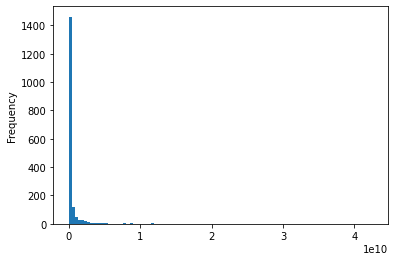

In [ ]:
df4['Valor_Contrato_Presente_2020'].plot.hist(bins = 100)

In [ ]:
df4['Valor_Contrato_Presente_2020'].describe()

count            1,775.00
mean       508,593,855.47
std      1,987,704,230.60
min              3,460.00
25%         19,429,293.33
50%         60,339,353.33
75%        257,257,533.89
max     42,615,578,193.33
Name: Valor_Contrato_Presente_2020, dtype: float64

In [ ]:
df4['Valor_Contrato_Presente_2020'].quantile(0.95)

2259779003.7124176

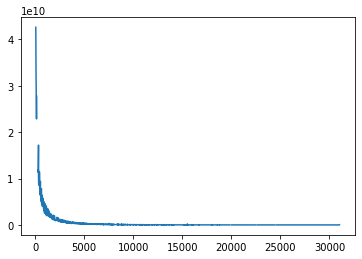

In [ ]:
df4['Valor_Contrato_Presente_2020'].plot()

In [ ]:
df4['Valor_Contrato_Presente_2020']

0       140,662,977,145.22
1       126,655,168,295.16
2       147,017,910,455.18
3       147,161,080,690.37
4                     0.00
               ...        
31465                  NaN
31468                  NaN
31469                  NaN
31472                  NaN
31482                  NaN
Name: Valor_Contrato_Presente_2020, Length: 21951, dtype: object

## Hallazgos


### No de Empresas (Servicios) en RENOVA

- En la base de datos de empresas registradas en RENOVA hay 2522 servicios. De ellos, 2482 son NITs Únicos.

- En la Base de Contratos de RENOVA con el cliente Gobierno, hay 1792 contratos. En ellos, se encuentran 174 NITs únicos de servicios.

- En dicha base se encuentran varias columnas de NITs, lo que asumimos que se debe a que a un solo contrato pueden corresponder varios contratistas. Si se considera que son contratos individuales, el número de contratos es de 1809 

- De esos 174 servicios, solo hay un NIT estaba en la base de datos de Empresas de RENOVA

---

- En la Base de Contratos de RENOVA con todos los clientes, hay 173136 contratos. En ellos, se reportan  743 NITs únicos de servicios

- Por el mismo motivo de la base anterior, si se tiene en cuenta que hay varias columnas y se expande el número real de contratos, se tienen 174489 contratos

- De esos 743 servicios, hay 4 que están en la base de datos de Empresas Registradas en RENOVA. Ninguno de esos 743 servicios están en la base de contratos con el gobierno. 

---



## No de Empresas (Servicios) según SECOP

Las siguientes conclusiones son agregadas en el tiempo. corresponden aun horizonte de 5 años. Un factor determinante de esto es que la base de datos de RENOVA se actualiza cada año, con los datos del año anterior, así que aquí solo tenemos datos hasta 2020. Mientras que la base de datos SECOP se actualiza muy rápidamente. Aqui estamos consultando los datos disponibles hasta el 20 de ulio de 2022. Sin embargo la sistematización en SECOP sólo ha sido implementada con fuerza desde el año 2016.

Además de ello, hemos encontrado patrones de decrecimiento en el registro, por lo tanto no podemos calcular con confiabilidad tasas y cifras anuales. 

---

- La base de datos inicial de SECOP-I contenía unicamente 752 contratos. En ellos se listan 218 NITs de empresas únicos. 

- 22 de estas empresas se encuentran en la base de datos de Empresas de RENOVA

- No hay identificadores individuales de contratos, pero se pudo estimar que 35 de esos contratos estaban tanto en la base de datos de SECOP-II como en el reporte de contratos de RENOVA

---

- En la Base de Dats completa de SECP-I y SECOP-II tenemos 31153 contratos que corresponden a códigos UNSCP relacionados con el sector de Vigilancia y Seguridad Privada. 

- En ésta base encontramos 10395 NITs únicos de empresas (servicios)

- De ellos, 373 NITs corresponden a empresas en el registro en RENOVA.

- Dichas empresas aparecen como contratistas en 1932 contratos en la Base de Datos SECOP I & II completa. 

---

- Finalmente, los contratos que aparecen reportados en SECOP y en RENOVA son 139. Este numero no es muy confiable pues Una diferencia de un caracter en la descripción o en alguna variable puede hacer parecer que ningun contrato es el mismo. Por ello es necesario revisar cada contrato uno por uno para asegurarse que sí es realmente el mismo contrato. Se encotraron 139 contratos donde las fechas(el Año de firma) y los contratantes y contratistas coinciden. 

- Con fecha posterior a 2015 se tienen 1923 contratos, a los cuales se les indagó un poco en el valor de contratos. Se encontró que la gran mayoría de esos contratos reportaban valores de contrato muy pequeños. 

- De forma agregada, el número de contratos que viene siendo reportado por empresas registradas así como el valor acumulado de dichos contratos viene decreciendo año tras año. 

- Hay en SECOP 1932 contratos de empresas registradas. Esto incluye las que son obligadas a reportar y las que no. De ellos, 139 contratos están también reportados en RENOVA. 


- Se puede estimar que el total de contratos con el sector público en todo el período es de 1932 contratos en SECOP + 732 contratos en RENOVA -80 que están repetidos, es decir, 2610 contratos.

## Empresas Obligadas a Reportar

Finalmente, luego de una revisión manual, se encontró que solamente **12 contratos **están en ambas bases de datos, verificando los siguientes criterios:
- El NIT de la entidad contratante es el mismo y la razón social es similar
- El NIT del contratista es el mismo y su razon social es similar
- El valor del contrato es similar, aunque no el mismo
- Las fechas de adjudicación y de inicio y fin de ejecución concuerdan, aunque no son las mismas

---
## cantidad de contratos semi reportados
Sin usar dicho criterio estricto, podemos afirmar que tenemos en total **30 contratos** que presentan características similares, pero difieren en los años de ejecución aunque el valor del contrato es similar

---
## Tamaño total de la población de contratos.
Podemos eliminar los 12 contratos duplicados y establecer que el tamano estimado de la población total de contratos es la unión de los contratos de SECOP y los contratos registrados en RENOVA.

Es decir: 1792 contratos en RENOVA + 752 contratos en SECOP - 12 contratos repetidos = 2532 contratos de vigilancia y seguridad. Esto es, de empresas obligadas a reportar. Los contratos en SECOP son con el gobierno. 











In [ ]:
1792+752-12

## Calculo del subregistro: 

- Como el reporte de contratos (de empresas obligadas a reportar) es de 1 empresa con contratos con el gobierno y 4 empresas con contratos con otros clientes; qie estén registradas  en RENOVA, tenemos que el **99%** de los contratos reportados en RENOVA no tienen un NIT asociado que esté también registrado en RENOVA. 

- 373 empresas registradas en RENOVA aparecen en 1932 contratos públicos en SECOP. o es posible establecer si hay un subregistro o no, dado que no todas están obligadas a reportar y a que la Base de Datos de SECOP también puede tener errores de tipeo o sistematización y podemos estar dejando de ver contratos asi como es posible que hayamos incluido contratos que no son de vigilancia y seguridad privada. Sin embargo, el numero parece indicar que hay un adecuado registro y corresponde con el 15% de las empresas (servicios) registradas. 

- Los valores de los contratos reportados en RENOVA son muy bajos. Algunos de los valores de los contratos en SECOP-I & II tampoco parecen creíbles, pero tienen mucha mas confiabilidad.


# Tareas

De contratos_gobierno_tipo_vigilado_Datos Validos

Sacar los servicios de vigilancia
cuales son con armas y sin armas
el valor para los contratos
fecha de inicio que tengan
agrupar por fecha de inicio

Entrego una tabla para comparar contra los resultados sacados en secop
se comparan por NITS
cuales estan en ambas tablas y cual es el valor del contrato





Valor de los contratos por año de solamentes : servicios de vigilancia y servicios de sistema de seguridad. vs el valor que se registra en Renova para los servicios de vigilancia privada con armas y sin armas, con cliente gobierno.



Cuales son los Nits en lo anterior en secop
Cuales son los Nits en lo anterior en Renova.



Cuales los que estan en ambos y cual es el valor de su contratación.



Verificar cuales son los tipos de servicios que reportan contratos en Renova.

esperar el código para identificar contratos de vigilancia y contratos de sistemas de seguridad

Empresas de Blindajes:



In [ ]:
NITs_blindadoras = [8110297679, 9005343081,9003787320,9000409554,8110347228,8300080545,9000766136,8300775160,9012389868,8110226758,8002225765,9006853301,8305150571,9003981190,8001998897,8301250750,9005036343,9002969180,8300692377,8300483621,8605280015,8301298270,9002692204,9007913983,9003392411,9005817036,9001514431,9002272014,9001092841,8301394976]
NITs_arrendadoras_vehiculos = [9011129637, 9000409554,9011953871,9003544891,9000327128,9008192584,9006853301,9002514321,9002071391,9005741740,9002483567,9001718218,9001852931,9003079362,9006735264,9004008100,9003257434,9010540397,9004395975,9002844346,9004949276,9012331171,9000813923,9002173912,9005570210,9001071409,9006845594]
NITs_transportadoras_valores = [9004378401, 8603502348, 9001708657, 8600065370, 8600693682, 8903222941, 9002605444, 9011904789, 9005437492]
